# 🚀 **Complete Machine Learning Preprocessing Guide**
*An Interactive Jupyter Notebook Tutorial*

<div align="center">

![Preprocessing](https://img.shields.io/badge/ML-Preprocessing-blue?style=for-the-badge&logo=python)
![Status](https://img.shields.io/badge/Status-Interactive-green?style=for-the-badge)
![Level](https://img.shields.io/badge/Level-Beginner%20to%20Advanced-orange?style=for-the-badge)

</div>

---

## 📚 **Welcome to Your Preprocessing Journey!**

This interactive notebook will guide you through **every essential step** of machine learning data preprocessing. Unlike static documentation, here you can **run actual code**, see real results, and experiment with different techniques.

### 🎯 **What You'll Learn:**
- ✅ **Data Understanding & Inspection** - Get familiar with your dataset
- ✅ **Handling Missing Data** - Deal with incomplete information  
- ✅ **Outlier Detection & Treatment** - Identify and handle extreme values
- ✅ **Data Type Conversion** - Optimize your data types
- ✅ **Encoding Categorical Variables** - Convert categories to numbers
- ✅ **Feature Scaling** - Normalize feature ranges
- ✅ **Feature Engineering** - Create new meaningful features
- ✅ **Feature Selection** - Choose the most relevant features
- ✅ **Text Preprocessing** - Clean and prepare text data
- ✅ **Data Splitting** - Separate training and testing data
- ✅ **Balancing Datasets** - Handle imbalanced classes

### 🔬 **Interactive Learning:**
Each section includes **runnable code examples** with real data, so you can see preprocessing in action!

---

## 📚 **Table of Contents**

> **Click on any section to jump directly to it!**

### 🔍 **Core Preprocessing Steps**
1. **[Data Understanding & Inspection](#1-data-understanding--inspection)** 🔍
2. **[Handling Missing Data](#2-handling-missing-data)** 🕳️
3. **[Handling Outliers](#3-handling-outliers)** 📈
4. **[Data Type Conversion](#4-data-type-conversion)** 🔄
5. **[Encoding Categorical Variables](#5-encoding-categorical-variables)** 🏷️
6. **[Feature Scaling](#6-feature-scaling)** ⚖️
7. **[Feature Engineering](#7-feature-engineering)** 🛠️
8. **[Feature Selection](#8-feature-selection)** 🎯
9. **[Text Preprocessing](#9-text-preprocessing)** 📝
10. **[Data Splitting](#10-data-splitting)** ✂️
11. **[Balancing the Dataset](#11-balancing-the-dataset)** ⚖️

### 🎯 **Advanced Topics**
- **[Complete Pipeline Example](#complete-pipeline-example)** 🔗
- **[Evaluation Metrics](#evaluation-metrics)** 📊
- **[Best Practices](#best-practices)** ✨

---

In [1]:
# 📦 Import All Required Libraries
print("🔄 Loading libraries...")

# Core data manipulation
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('default')  # Works well with both light/dark themes

# Machine Learning
from sklearn.datasets import make_classification, load_iris, load_breast_cancer
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, MinMaxScaler, RobustScaler
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Text processing (will install if needed)
try:
    import nltk
    from nltk.corpus import stopwords
    from nltk.stem import PorterStemmer, WordNetLemmatizer
    print("✅ NLTK libraries loaded successfully")
except ImportError:
    print("⚠️ NLTK not found - text preprocessing sections will show installation instructions")

# Imbalanced data handling
try:
    from imblearn.over_sampling import SMOTE
    from imblearn.pipeline import Pipeline as ImbPipeline
    print("✅ Imbalanced-learn libraries loaded successfully")
except ImportError:
    print("⚠️ imbalanced-learn not found - will show installation instructions when needed")

# Set display options for better output
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', 50)

print("✅ All libraries loaded successfully!")
print("🚀 Ready to start preprocessing!")

🔄 Loading libraries...
✅ NLTK libraries loaded successfully
✅ Imbalanced-learn libraries loaded successfully
✅ All libraries loaded successfully!
🚀 Ready to start preprocessing!


In [2]:
# 🎲 Create Synthetic Dataset for Learning
print("🔨 Creating synthetic dataset for demonstration...")

# Set random seed for reproducibility
np.random.seed(42)

# Create a comprehensive dataset with various data types and issues
n_samples = 1000

# Generate base data
data = {
    # Numerical features
    'age': np.random.randint(18, 80, n_samples),
    'income': np.random.normal(50000, 20000, n_samples),
    'credit_score': np.random.randint(300, 850, n_samples),
    'years_employed': np.random.exponential(5, n_samples),
    
    # Categorical features
    'education': np.random.choice(['High School', 'Bachelor', 'Master', 'PhD'], n_samples, 
                                p=[0.4, 0.35, 0.2, 0.05]),
    'city': np.random.choice(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], 
                            n_samples, p=[0.3, 0.25, 0.2, 0.15, 0.1]),
    'employment_type': np.random.choice(['Full-time', 'Part-time', 'Contract', 'Unemployed'], 
                            n_samples, p=[0.6, 0.2, 0.15, 0.05]),
    
    # Text feature
    'job_description': [f"Job description {i} with various skills and requirements" for i in range(n_samples)],
    
    # Target variable (loan approval: 0=denied, 1=approved)
    'loan_approved': np.random.choice([0, 1], n_samples, p=[0.3, 0.7])
}

# Create DataFrame
df = pd.DataFrame(data)

# Add some realistic issues to the data
# 1. Missing values (randomly)
missing_mask = np.random.random(n_samples) < 0.1
df.loc[missing_mask, 'income'] = np.nan

missing_mask = np.random.random(n_samples) < 0.05
df.loc[missing_mask, 'education'] = np.nan

# 2. Outliers in income
outlier_indices = np.random.choice(n_samples, size=50, replace=False)
df.loc[outlier_indices, 'income'] = np.random.normal(200000, 50000, 50)

# 3. Some negative years_employed (data entry errors)
error_indices = np.random.choice(n_samples, size=20, replace=False)
df.loc[error_indices, 'years_employed'] = -np.random.exponential(2, 20)

print(f"✅ Dataset created with {len(df)} samples and {len(df.columns)} features")
print(f"📊 Shape: {df.shape}")
print(f"🎯 Target distribution: {df['loan_approved'].value_counts().to_dict()}")

# Display first few rows
print("\n👀 First 5 rows of our dataset:")
display(df.head())

🔨 Creating synthetic dataset for demonstration...
✅ Dataset created with 1000 samples and 9 features
📊 Shape: (1000, 9)
🎯 Target distribution: {1: 706, 0: 294}

👀 First 5 rows of our dataset:


,age,income,credit_score,years_employed,education,city,employment_type,job_description,loan_approved
0,56,77447.555931,541,11.844744,High School,Los Angeles,Full-time,Job description 0 with various skills and requ...,1
1,69,36444.278140,531,0.894922,Master,Chicago,Contract,Job description 1 with various skills and requ...,0
2,46,73070.637440,583,5.147562,High School,Chicago,Full-time,Job description 2 with various skills and requ...,1
3,32,42499.787433,499,8.299978,High School,Houston,Full-time,Job description 3 with various skills and requ...,1
4,60,36117.080930,378,14.724744,High School,Houston,Contract,Job description 4 with various skills and requ...,0


<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #28a745, #20c997); color: white; border-radius: 8px; margin: 10px 0;">
    🔍 1. Data Understanding & Inspection
</summary>

<div style="padding: 20px; background: rgba(40, 167, 69, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose** 
Get familiar with your dataset structure and identify potential issues early.

### **🎯 Key Steps**
- Load the dataset using appropriate libraries (`pandas`, `numpy`)
- Understand the structure: `.shape`, `.info()`, `.describe()`
- Visual inspection: `.head()`, `.tail()`, `.sample()`
- Identify data types (numerical, categorical, datetime, text, etc.)
- Check for duplicate records

### **✅ Best Practices**
<div style="background: rgba(255, 193, 7, 0.1); border-left: 4px solid #ffc107; padding: 15px; margin: 15px 0;">

- 👉 **Always start with data profiling**
- 👉 **Document your findings**
- 👉 **Look for patterns in missing data**
- 👉 **Check data consistency across columns**

</div>

</details>

In [3]:
# 🔍 Data Understanding & Inspection - Live Demo

print("📊 BASIC DATASET INFORMATION")
print("=" * 50)

# Basic information about the dataset
print(f"Dataset shape: {df.shape}")
print(f"Memory usage : {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
print()

# Data types and non-null counts
print("📋 COLUMN INFORMATION:")
print(df.info())
print()

# Basic statistics for numerical columns
print("📈 NUMERICAL STATISTICS:")
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
display(df[numerical_cols].describe())
print()

# Categorical column analysis
print("🏷️ CATEGORICAL COLUMNS:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
# Remove text columns for this analysis
categorical_cols = [col for col in categorical_cols if col != 'job_description']

for col in categorical_cols:
    print(f"\n{col.upper()}:")
    print(df[col].value_counts())

# Missing values analysis
print("\n🕳️ MISSING VALUES ANALYSIS:")
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
}).sort_values('Missing Count', ascending=False)

display(missing_df[missing_df['Missing Count'] > 0])

# Check for duplicates
print(f"\n🔍 DUPLICATE RECORDS: {df.duplicated().sum()}")

# Sample data inspection
print("\n👀 RANDOM SAMPLE (3 rows):")
display(df.sample(3, random_state=42))

📊 BASIC DATASET INFORMATION
Dataset shape: (1000, 9)
Memory usage : 0.29 MB

📋 COLUMN INFORMATION:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   age              1000 non-null   int32  
 1   income           910 non-null    float64
 2   credit_score     1000 non-null   int32  
 3   years_employed   1000 non-null   float64
 4   education        952 non-null    object 
 5   city             1000 non-null   object 
 6   employment_type  1000 non-null   object 
 7   job_description  1000 non-null   object 
 8   loan_approved    1000 non-null   int32  
dtypes: float64(2), int32(3), object(4)
memory usage: 58.7+ KB
None

📈 NUMERICAL STATISTICS:


,age,income,credit_score,years_employed,loan_approved
count,1000.000000,910.000000,1000.000000,1000.000000,1000.00000
mean,49.857000,59211.490444,581.145000,5.011110,0.70600
std,18.114267,42487.936819,158.615462,4.938035,0.45582
min,18.000000,-21364.105987,300.000000,-5.721424,0.00000
25%,35.000000,38284.782868,445.750000,1.563533,0.00000
50%,50.000000,52830.876001,578.500000,3.604966,1.00000
75%,66.000000,67680.545878,720.000000,7.146675,1.00000
max,79.000000,368869.145954,849.000000,38.464198,1.00000



🏷️ CATEGORICAL COLUMNS:

EDUCATION:
education
High School    416
Bachelor       308
Master         196
PhD             32
Name: count, dtype: int64

CITY:
city
New York       308
Los Angeles    263
Chicago        191
Houston        155
Phoenix         83
Name: count, dtype: int64

EMPLOYMENT_TYPE:
employment_type
Full-time     589
Part-time     219
Contract      145
Unemployed     47
Name: count, dtype: int64

🕳️ MISSING VALUES ANALYSIS:


,Column,Missing Count,Missing Percentage
1,income,90,9.0
4,education,48,4.8



🔍 DUPLICATE RECORDS: 0

👀 RANDOM SAMPLE (3 rows):


,age,income,credit_score,years_employed,education,city,employment_type,job_description,loan_approved
521,42,183841.616715,489,10.666890,High School,New York,Part-time,Job description 521 with various skills and re...,0
737,53,68869.276837,312,4.508030,NaN,New York,Full-time,Job description 737 with various skills and re...,1
740,78,NaN,413,1.311987,Bachelor,Los Angeles,Full-time,Job description 740 with various skills and re...,1


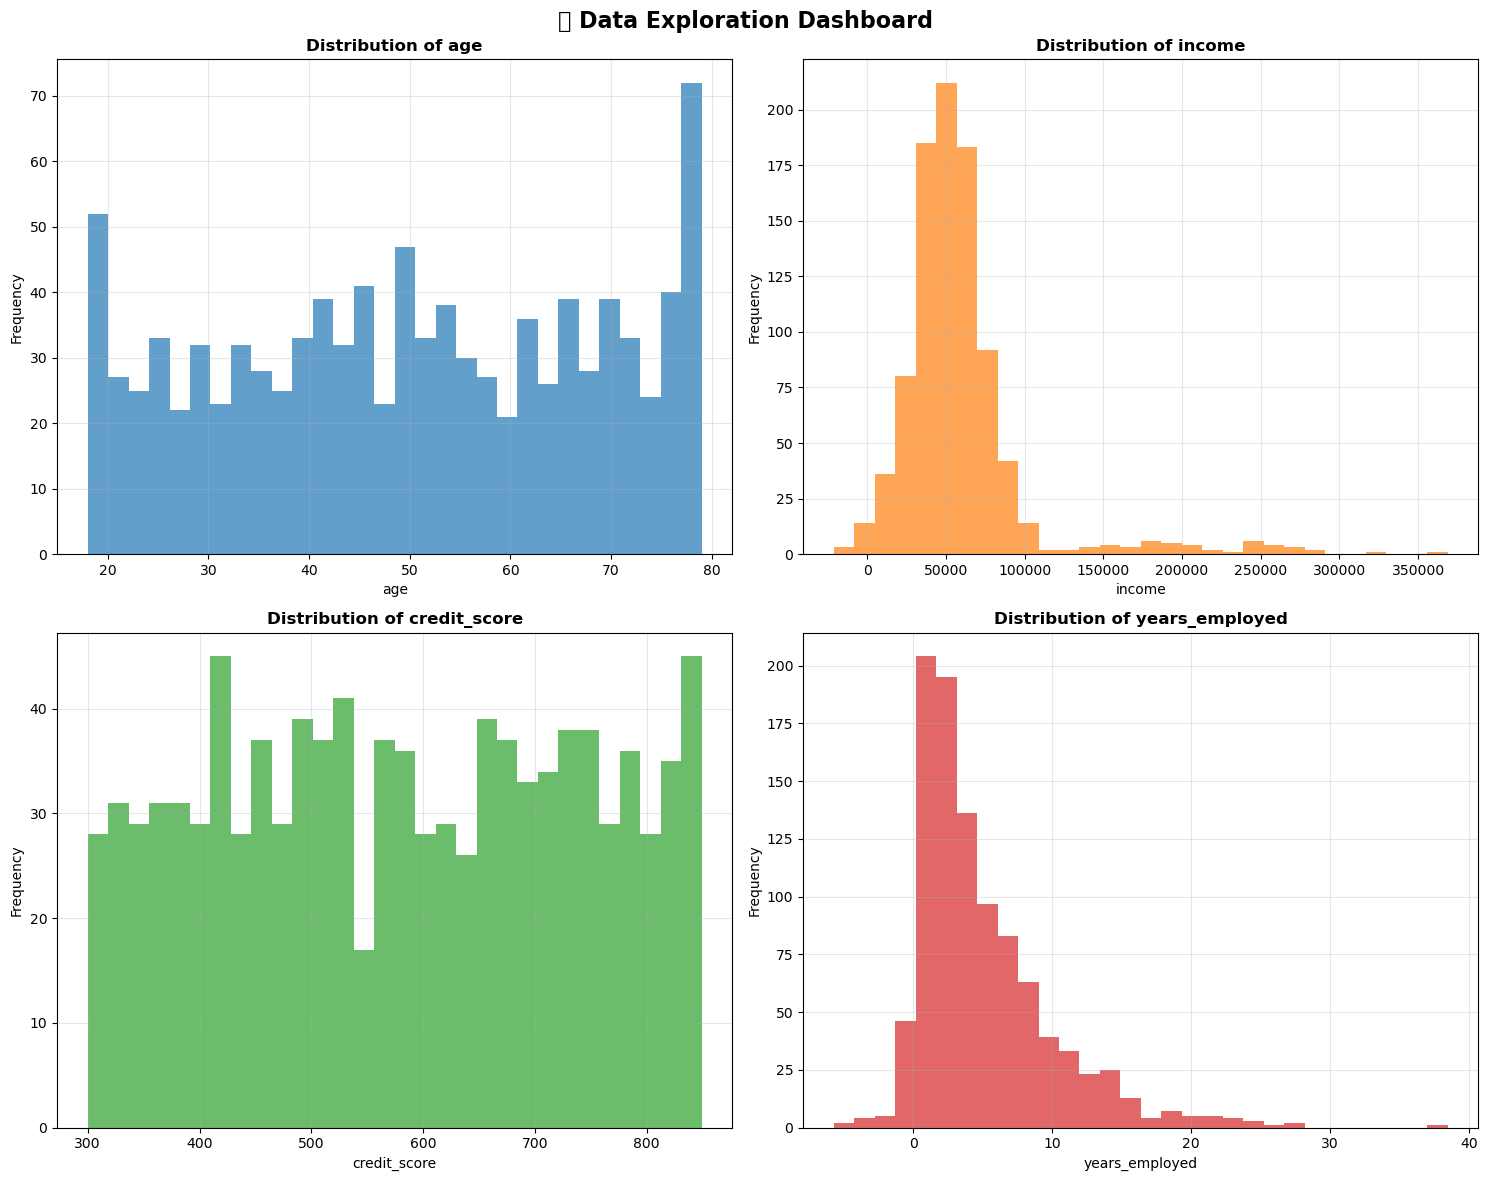

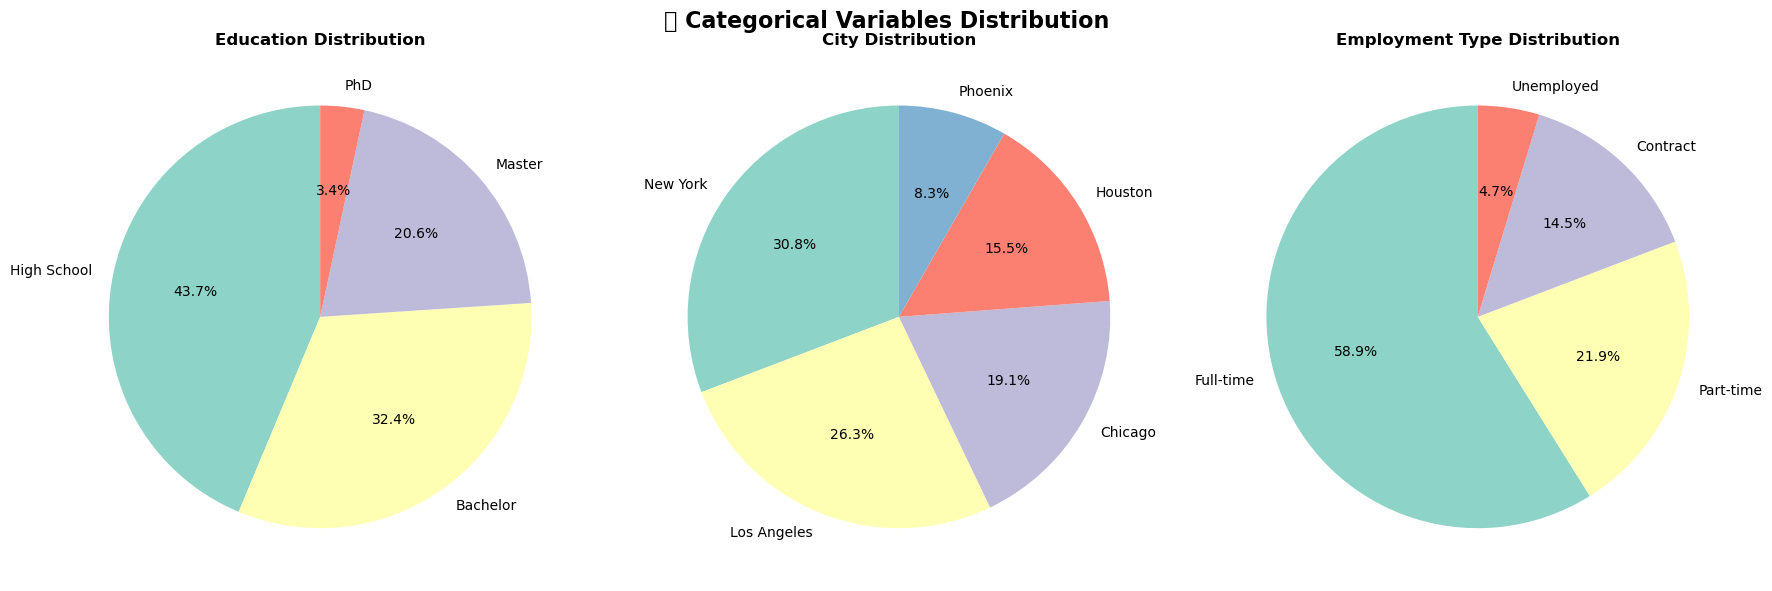

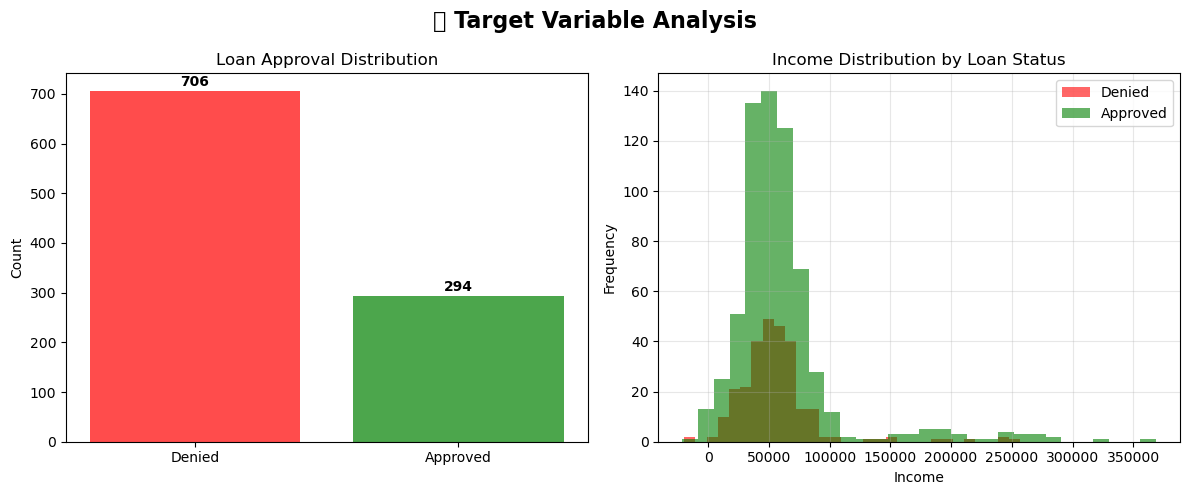

✅ Visual exploration complete! Notice the patterns in your data.


In [4]:
# 📊 Visual Data Exploration

# Create visualizations for better understanding
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('🔍 Data Exploration Dashboard', fontsize=16, fontweight='bold')

# 1. Distribution of numerical features
numerical_cols = df.select_dtypes(include=[np.number]).columns.tolist()
numerical_cols.remove('loan_approved')  # Remove target variable

for i, col in enumerate(numerical_cols[:4]):  # Plot first 4 numerical columns
    row, col_idx = divmod(i, 2)
    axes[row, col_idx].hist(df[col].dropna(), bins=30, alpha=0.7, color=f'C{i}')
    axes[row, col_idx].set_title(f'Distribution of {col}', fontweight='bold')
    axes[row, col_idx].set_xlabel(col)
    axes[row, col_idx].set_ylabel('Frequency')
    axes[row, col_idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 2. Categorical variables visualization
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle('🏷️ Categorical Variables Distribution', fontsize=16, fontweight='bold')

categorical_cols_viz = ['education', 'city', 'employment_type']

for i, col in enumerate(categorical_cols_viz):
    value_counts = df[col].value_counts()
    axes[i].pie(value_counts.values, labels=value_counts.index, autopct='%1.1f%%', 
                startangle=90, colors=plt.cm.Set3.colors)
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution', fontweight='bold')

plt.tight_layout()
plt.show()

# 3. Target variable analysis
fig, axes = plt.subplots(1, 2, figsize=(12, 5))
fig.suptitle('🎯 Target Variable Analysis', fontsize=16, fontweight='bold')

# Target distribution
target_counts = df['loan_approved'].value_counts()
axes[0].bar(['Denied', 'Approved'], target_counts.values, color=['red', 'green'], alpha=0.7)
axes[0].set_title('Loan Approval Distribution')
axes[0].set_ylabel('Count')
for i, v in enumerate(target_counts.values):
    axes[0].text(i, v + 10, str(v), ha='center', fontweight='bold')

# Target vs Income (example relationship)
df_clean = df.dropna(subset=['income'])
denied = df_clean[df_clean['loan_approved'] == 0]['income']
approved = df_clean[df_clean['loan_approved'] == 1]['income']

axes[1].hist(denied, bins=30, alpha=0.6, label='Denied', color='red')
axes[1].hist(approved, bins=30, alpha=0.6, label='Approved', color='green')
axes[1].set_title('Income Distribution by Loan Status')
axes[1].set_xlabel('Income')
axes[1].set_ylabel('Frequency')
axes[1].legend()
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("✅ Visual exploration complete! Notice the patterns in your data.")

<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #dc3545, #fd7e14); color: white; border-radius: 8px; margin: 10px 0;">
    🕳️ 2. Handling Missing Data
</summary>

<div style="padding: 20px; background: rgba(220, 53, 69, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Deal with incomplete data that can negatively impact model performance.

### **🔍 Detection Methods**
```python
df.isnull().sum()        #  Count missing values
df.isnull().sum().sum()  # Total missing values
```

### **🛠️ Strategies**

#### **1️⃣ Deletion Approach**
<div style="background: rgba(220, 53, 69, 0.1); border-left: 4px solid #dc3545; padding: 10px; margin: 10px 0;">

- **Drop rows**: When missing data is random and dataset is large ⚠️
- **Drop columns**: When >70% values are missing ⚠️

</div>

#### **2️⃣ Imputation Approach**

**📊 Numerical Data:**
- **Mean** (for normal distribution)
- **Median** (for skewed data, robust to outliers)
- **Mode** (for categorical-like numerical data)

**🏷️ Categorical Data:**
- **Mode** (most frequent value)
- **Create "Unknown" category**

**🚀 Advanced Methods:**
- **KNN Imputation**
- **Iterative Imputation**
- **Forward/Backward fill** (for time series)


In [5]:
# 🕳️ Handling Missing Data - Live Demo

print("🔍 MISSING DATA ANALYSIS")
print("=" * 50)

# Create a copy for missing data handling
df_missing = df.copy()

# Show current missing data
missing_summary = df_missing.isnull().sum()
print("Current missing values:")
print(missing_summary[missing_summary > 0])
print()

# Method 1: Simple Imputation for Numerical Data
print("📊 METHOD 1: SIMPLE IMPUTATION")
print("-" * 30)

# For income (numerical) - use median (robust to outliers)
income_median = df_missing['income'].median()
print(f"Income median: ${income_median:,.2f}")

# Apply median imputation
df_missing['income_median_imputed'] = df_missing['income'].fillna(income_median)

# For education (categorical) - use mode
education_mode = df_missing['education'].mode()[0]
print(f"Education mode: {education_mode}")

# Apply mode imputation
df_missing['education_mode_imputed'] = df_missing['education'].fillna(education_mode)

print("✅ Simple imputation completed")
print()

# Method 2: Scikit-learn Imputers
print("🤖 METHOD 2: SCIKIT-LEARN IMPUTERS")
print("-" * 35)

# Numerical imputation with SimpleImputer
numerical_cols_for_imputation = ['income', 'years_employed']
numerical_imputer = SimpleImputer(strategy='median')

# Fit and transform numerical columns
df_numerical_imputed = pd.DataFrame(
    numerical_imputer.fit_transform(df_missing[numerical_cols_for_imputation]),
    columns=numerical_cols_for_imputation,
    index=df_missing.index
)

print("Numerical columns after imputation:")
print(f"Missing values: {df_numerical_imputed.isnull().sum().sum()}")

# Categorical imputation
categorical_imputer = SimpleImputer(strategy='most_frequent')
categorical_cols_for_imputation = ['education']

df_categorical_imputed = pd.DataFrame(
    categorical_imputer.fit_transform(df_missing[categorical_cols_for_imputation]),
    columns=categorical_cols_for_imputation,
    index=df_missing.index
)

print("Categorical columns after imputation:")
print(f"Missing values: {df_categorical_imputed.isnull().sum().sum()}")
print()

# Method 3: KNN Imputation (Advanced)
print("🎯 METHOD 3: KNN IMPUTATION")
print("-" * 25)

# Prepare data for KNN imputation (only numerical columns)
numerical_only = df_missing[['age', 'income', 'credit_score', 'years_employed']].copy()

# Apply KNN imputation
knn_imputer = KNNImputer(n_neighbors=5)
numerical_knn_imputed = pd.DataFrame(
    knn_imputer.fit_transform(numerical_only),
    columns=numerical_only.columns,
    index=df_missing.index
)

print("KNN imputation completed!")
print(f"Missing values after KNN: {numerical_knn_imputed.isnull().sum().sum()}")
print()

# Compare imputation methods
print("📈 COMPARISON OF IMPUTATION METHODS")
print("-" * 40)

original_income = df_missing['income'].dropna()
median_imputed = df_missing['income_median_imputed'].dropna()
knn_imputed = numerical_knn_imputed['income']

comparison_stats = pd.DataFrame({
    'Method': ['Original', 'Median Imputation', 'KNN Imputation'],
    'Mean': [original_income.mean(), median_imputed.mean(), knn_imputed.mean()],
    'Median': [original_income.median(), median_imputed.median(), knn_imputed.median()],
    'Std': [original_income.std(), median_imputed.std(), knn_imputed.std()]
})

display(comparison_stats.round(2))

print("\n✅ Missing data handling demonstration complete!")

🔍 MISSING DATA ANALYSIS
Current missing values:
income       90
education    48
dtype: int64

📊 METHOD 1: SIMPLE IMPUTATION
------------------------------
Income median: $52,830.88
Education mode: High School
✅ Simple imputation completed

🤖 METHOD 2: SCIKIT-LEARN IMPUTERS
-----------------------------------
Numerical columns after imputation:
Missing values: 0
Categorical columns after imputation:
Missing values: 0

🎯 METHOD 3: KNN IMPUTATION
-------------------------
KNN imputation completed!
Missing values after KNN: 0

📈 COMPARISON OF IMPUTATION METHODS
----------------------------------------


,Method,Mean,Median,Std
0,Original,59211.49,52830.88,42487.94
1,Median Imputation,58637.24,52830.88,40570.06
2,KNN Imputation,59631.68,53535.50,40994.72



✅ Missing data handling demonstration complete!


<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #6f42c1, #e83e8c); color: white; border-radius: 8px; margin: 10px 0;">
    📈 3. Handling Outliers
</summary>

<div style="padding: 20px; background: rgba(111, 66, 193, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Identify and handle extreme values that can skew model performance.

### **🔍 Detection Methods**

#### **1️⃣ Visual Methods**
- **Box plots**: `sns.boxplot()`
- **Scatter plots**: `plt.scatter()`
- **Histograms**: `df.hist()`

#### **2️⃣ Statistical Methods**

**📐 IQR Method:** Values beyond Q1-1.5×IQR or Q3+1.5×IQR     
**📊 Z-Score:** Values with |z-score| > 3                   
**🎯 Modified Z-Score:** Using median absolute deviation    

### **🛠️ Treatment Options**

<div style="display: grid; grid-template-columns: 1fr 1fr; gap: 15px; margin: 15px 0;">

<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px;">
<strong>🗑️ Remove</strong><br>
Delete outlier records
</div>

<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px;">
<strong>🔒 Cap/Floor</strong><br>
Set to percentile limits
</div>

<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px;">
<strong>🔄 Transform</strong><br>
Log, square root, Box-Cox
</div>

<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px;">
<strong>📦 Binning</strong><br>
Convert to categorical ranges
</div>

</div>


<div style="background: rgba(255, 193, 7, 0.1); border-left: 4px solid #ffc107; padding: 15px; margin: 15px 0;">

**⚠️ Important:** Don't automatically remove all outliers! Some might represent important patterns or rare but valid cases. Always investigate the context before deciding on treatment.

</div>

</div>
</details>


🔍 OUTLIER DETECTION AND HANDLING
Original income data shape: 1000
Income statistics:
count      1000.000000
mean      58637.235144
std       40570.057712
min      -21364.105987
25%       39795.241984
50%       52830.876001
75%       66004.654999
max      368869.145954
Name: income, dtype: float64

📊 METHOD 1: IQR (INTERQUARTILE RANGE)
----------------------------------------
Q1 (25th percentile): $39,795.24
Q3 (75th percentile): $66,004.65
IQR: $26,209.41
Lower bound: $481.12
Upper bound: $105,318.77
Outliers found: 58 (5.8%)

📊 METHOD 2: Z-SCORE
--------------------
Z-score threshold: 3
Outliers found: 32 (3.2%)



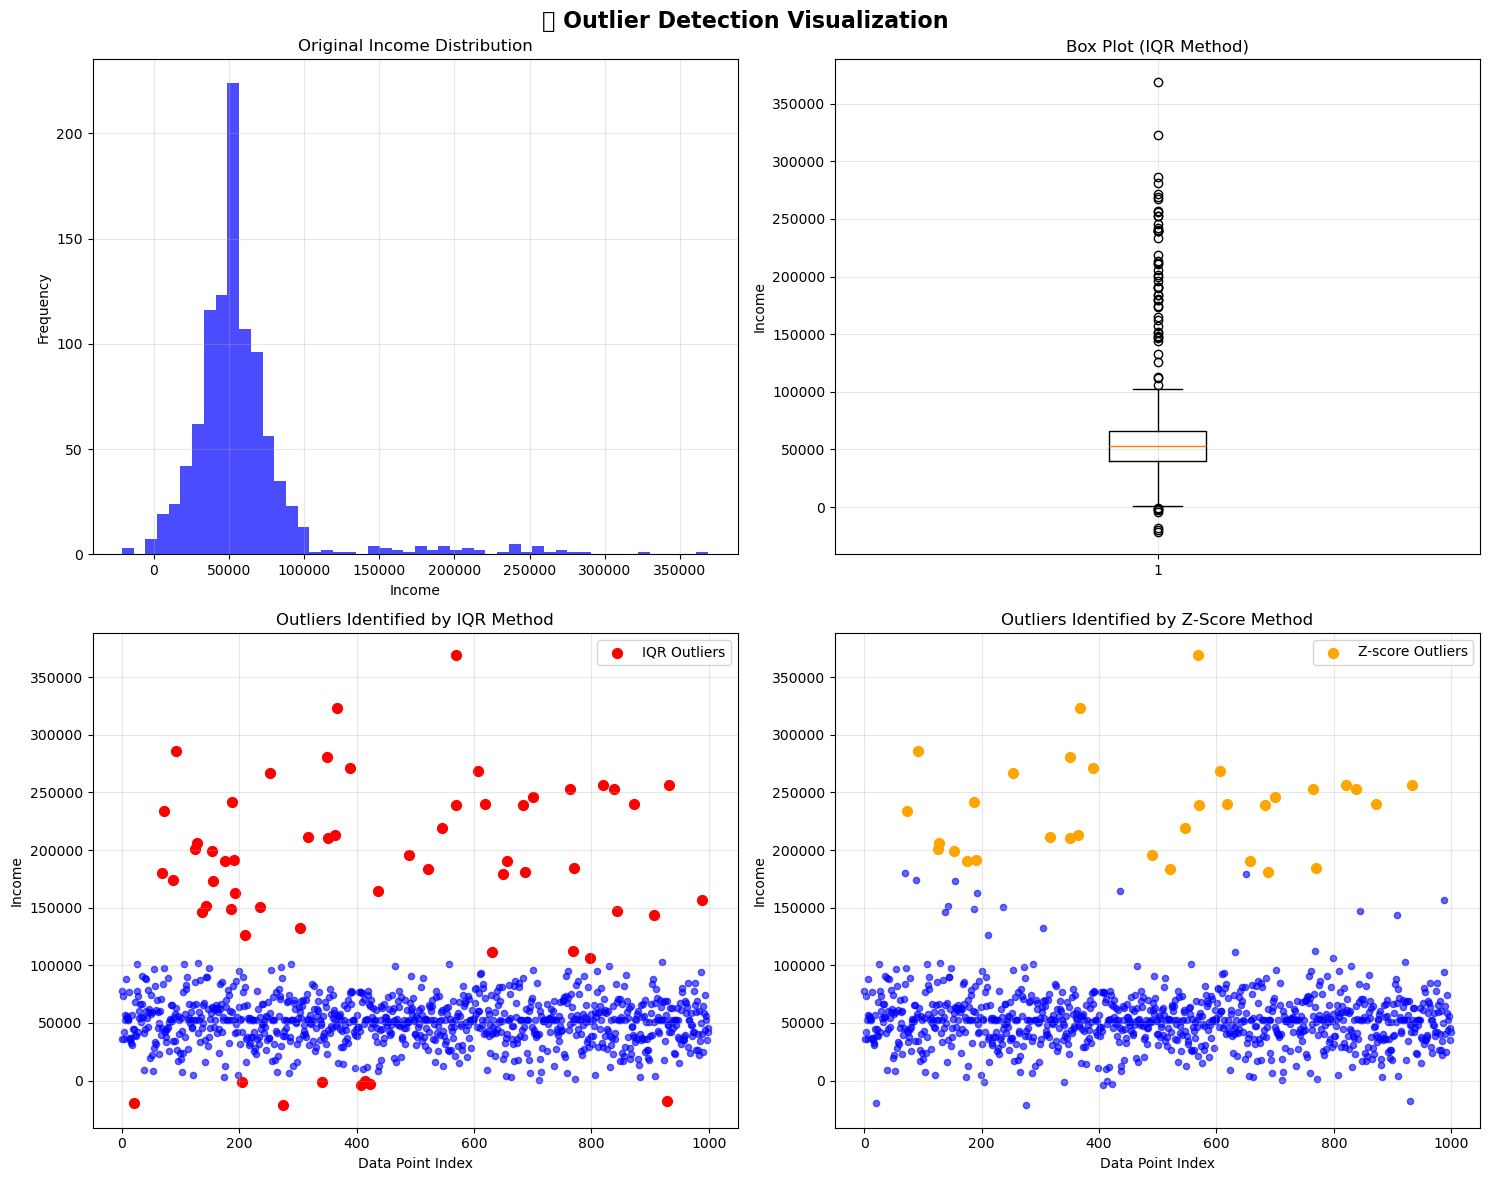

🛠️ OUTLIER TREATMENT METHODS
-----------------------------------
After removal: 942 samples (94.2% retained)
After winsorization: 1000 samples (100% retained)
After log transformation: 1000 samples (100% retained)


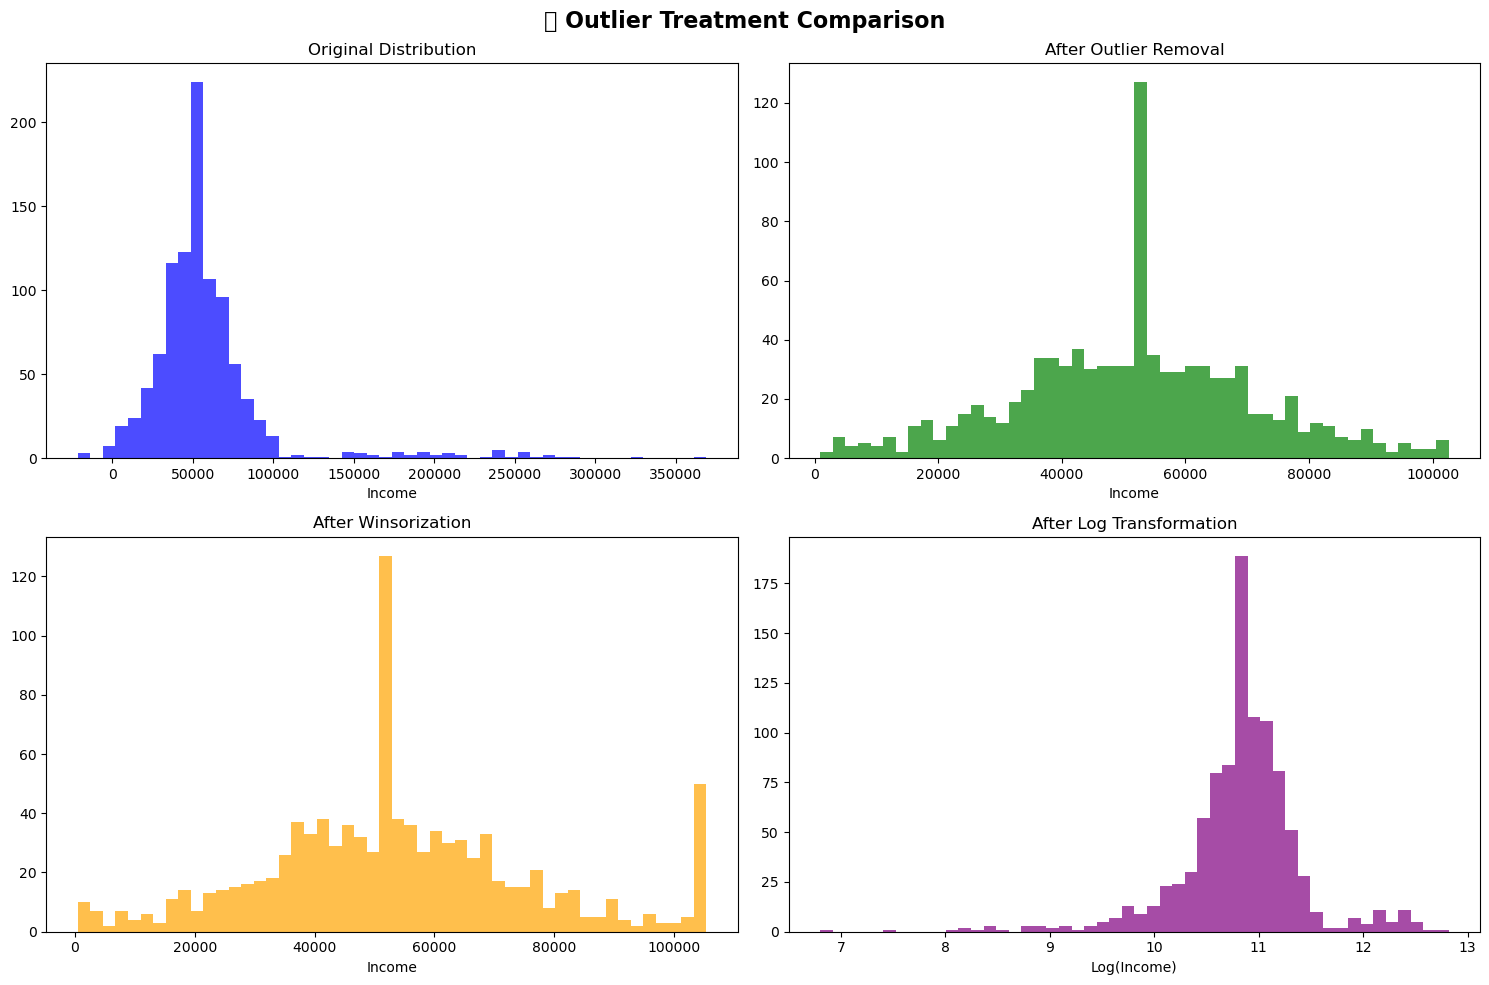

✅ Outlier detection and treatment demonstration complete!


In [6]:
# 📈 Outlier Detection & Handling - Live Demo

print("🔍 OUTLIER DETECTION AND HANDLING")
print("=" * 50)

# Create a clean dataset for outlier analysis
df_outliers = df.copy()

# Fill missing values first (required for outlier detection)
df_outliers['income'] = df_outliers['income'].fillna(df_outliers['income'].median())

# Focus on income column for demonstration
income_data = df_outliers['income']

print(f"Original income data shape: {len(income_data)}")
print(f"Income statistics:")
print(income_data.describe())
print()

# Method 1: IQR Method
print("📊 METHOD 1: IQR (INTERQUARTILE RANGE)")
print("-" * 40)

Q1 = income_data.quantile(0.25)
Q3 = income_data.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Q1 (25th percentile): ${Q1:,.2f}")
print(f"Q3 (75th percentile): ${Q3:,.2f}")
print(f"IQR: ${IQR:,.2f}")
print(f"Lower bound: ${lower_bound:,.2f}")
print(f"Upper bound: ${upper_bound:,.2f}")

# Identify outliers
outliers_iqr = income_data[(income_data < lower_bound) | (income_data > upper_bound)]
print(f"Outliers found: {len(outliers_iqr)} ({len(outliers_iqr)/len(income_data)*100:.1f}%)")
print()

# Method 2: Z-Score Method
print("📊 METHOD 2: Z-SCORE")
print("-" * 20)

from scipy import stats
z_scores = np.abs(stats.zscore(income_data))
threshold = 3
outliers_zscore = income_data[z_scores > threshold]

print(f"Z-score threshold: {threshold}")
print(f"Outliers found: {len(outliers_zscore)} ({len(outliers_zscore)/len(income_data)*100:.1f}%)")
print()

# Visualization of outliers
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
fig.suptitle('📈 Outlier Detection Visualization', fontsize=16, fontweight='bold')

# Original distribution
axes[0,0].hist(income_data, bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('Original Income Distribution')
axes[0,0].set_xlabel('Income')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# Box plot showing outliers
axes[0,1].boxplot(income_data)
axes[0,1].set_title('Box Plot (IQR Method)')
axes[0,1].set_ylabel('Income')
axes[0,1].grid(True, alpha=0.3)

# Scatter plot with outliers highlighted
axes[1,0].scatter(range(len(income_data)), income_data, alpha=0.6, c='blue', s=20)
outlier_indices_iqr = income_data[(income_data < lower_bound) | (income_data > upper_bound)].index
axes[1,0].scatter(outlier_indices_iqr, income_data.loc[outlier_indices_iqr], 
                c='red', s=50, label='IQR Outliers')
axes[1,0].set_title('Outliers Identified by IQR Method')
axes[1,0].set_xlabel('Data Point Index')
axes[1,0].set_ylabel('Income')
axes[1,0].legend()
axes[1,0].grid(True, alpha=0.3)

# Z-score outliers
outlier_indices_zscore = income_data[z_scores > threshold].index
axes[1,1].scatter(range(len(income_data)), income_data, alpha=0.6, c='blue', s=20)
axes[1,1].scatter(outlier_indices_zscore, income_data.loc[outlier_indices_zscore], 
                c='orange', s=50, label='Z-score Outliers')
axes[1,1].set_title('Outliers Identified by Z-Score Method')
axes[1,1].set_xlabel('Data Point Index')
axes[1,1].set_ylabel('Income')
axes[1,1].legend()
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Treatment Methods
print("🛠️ OUTLIER TREATMENT METHODS")
print("-" * 35)

# Method 1: Removal
income_removed = income_data[(income_data >= lower_bound) & (income_data <= upper_bound)]
print(f"After removal: {len(income_removed)} samples ({len(income_removed)/len(income_data)*100:.1f}% retained)")

# Method 2: Winsorization (Capping)
income_winsorized = income_data.copy()
income_winsorized = np.where(income_winsorized > upper_bound, upper_bound, income_winsorized)
income_winsorized = np.where(income_winsorized < lower_bound, lower_bound, income_winsorized)
print(f"After winsorization: {len(income_winsorized)} samples (100% retained)")

# Method 3: Log transformation
income_log = np.log1p(income_data)  # log1p handles zeros better
print(f"After log transformation: {len(income_log)} samples (100% retained)")

# Compare distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
fig.suptitle('🔧 Outlier Treatment Comparison', fontsize=16, fontweight='bold')

# Original
axes[0,0].hist(income_data, bins=50, alpha=0.7, color='blue')
axes[0,0].set_title('Original Distribution')
axes[0,0].set_xlabel('Income')

# After removal
axes[0,1].hist(income_removed, bins=50, alpha=0.7, color='green')
axes[0,1].set_title('After Outlier Removal')
axes[0,1].set_xlabel('Income')

# After winsorization
axes[1,0].hist(income_winsorized, bins=50, alpha=0.7, color='orange')
axes[1,0].set_title('After Winsorization')
axes[1,0].set_xlabel('Income')

# After log transformation
axes[1,1].hist(income_log, bins=50, alpha=0.7, color='purple')
axes[1,1].set_title('After Log Transformation')
axes[1,1].set_xlabel('Log(Income)')

plt.tight_layout()
plt.show()

print("✅ Outlier detection and treatment demonstration complete!")

<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #17a2b8, #6610f2); color: white; border-radius: 8px; margin: 10px 0;">
    🔄 4. Data Type Conversion
</summary>

<div style="padding: 20px; background: rgba(23, 162, 184, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Ensure data types are appropriate for analysis and modeling.

### **🔄 Common Conversions**

<div style="background: rgba(23, 162, 184, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- Convert `object` to `category` for categorical data (saves memory)
- Convert `strings` to `datetime` for temporal data
- Convert `categorical text labels` to `numerical codes`
- Convert `boolean strings` to `actual boolean type`

</div>

### **✅ Benefits**
- ✅ **Improved memory efficiency**
- ✅ **Better performance in operations**
- ✅ **Enables appropriate statistical operations**

### **💻 Implementation**
```python
import pandas as pd
import numpy as np

# Before optimization - check current memory usage
print("Memory usage before optimization:")
print(df.info(memory_usage='deep'))

# 1. Convert to category (saves memory for repeated strings)
categorical_columns = ['gender', 'city', 'product_category']
for col in categorical_columns:
    if col in df.columns:
        df[col] = df[col].astype('category')

# 2. Convert to datetime
date_columns = ['purchase_date', 'birth_date', 'registration_date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# 3. Convert boolean strings
boolean_mappings = {
    'is_premium': {'True': True, 'False': False, 'true': True, 'false': False},
    'is_active': {'Yes': True, 'No': False, 'Y': True, 'N': False}
}

for col, mapping in boolean_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

# 4. Optimize numeric types
# Downcast integers
int_columns = df.select_dtypes(include=['int64']).columns
for col in int_columns:
    df[col] = pd.to_numeric(df[col], downcast='integer')

# Downcast floats
float_columns = df.select_dtypes(include=['float64']).columns
for col in float_columns:
    df[col] = pd.to_numeric(df[col], downcast='float')

# 5. Handle mixed data types
def smart_convert(series):
    """Intelligently convert series to appropriate data type"""
    # Try numeric first
    try:
        return pd.to_numeric(series)
    except:
        pass
    
    # Try datetime
    try:
        return pd.to_datetime(series)
    except:
        pass
    
    # Try boolean
    if series.nunique() <= 2:
        unique_vals = series.unique()
        if set(unique_vals).issubset({'True', 'False', 'true', 'false', '1', '0', 1, 0}):
            return series.map({'True': True, 'False': False, 'true': True, 'false': False, '1': True, '0': False, 1: True, 0: False})
    
    # Default to category if few unique values
    if series.nunique() / len(series) < 0.5:
        return series.astype('category')
    
    return series

# Apply smart conversion to object columns
object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    df[col] = smart_convert(df[col])

# After optimization - check memory usage
print("\nMemory usage after optimization:")
print(df.info(memory_usage='deep'))

# Create a memory usage comparison function
def compare_memory_usage(df_before, df_after):
    """Compare memory usage before and after optimization"""
    memory_before = df_before.memory_usage(deep=True).sum()
    memory_after = df_after.memory_usage(deep=True).sum()
    reduction = (memory_before - memory_after) / memory_before * 100
    
    print(f"Memory before: {memory_before / 1024**2:.2f} MB")
    print(f"Memory after:  {memory_after / 1024**2:.2f} MB")
    print(f"Reduction:     {reduction:.1f}%")
```

<div style="background: rgba(40, 167, 69, 0.1); border-left: 4px solid #28a745; padding: 15px; margin: 15px 0;">

**🚀 Pro Tip:** Proper data type conversion can reduce memory usage by 50-90% for large datasets, significantly improving processing speed!

</div>

</div>
</details>

<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #fd7e14, #dc3545); color: white; border-radius: 8px; margin: 10px 0;">
    🏷️ 5. Encoding Categorical Variables
</summary>

<div style="padding: 20px; background: rgba(253, 126, 20, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Convert categorical data into numerical format for machine learning algorithms.

### **🎯 Encoding Methods**

#### **1️⃣ Label Encoding**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Best for:** Ordinal features (with natural order)
- **Creates:** Single column with integer values
- **Example:** Education level (High School=0, Bachelor=1, Master=2, PhD=3)

</div>

#### **2️⃣ One-Hot Encoding**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Best for:** Nominal features (no natural order)
- **Creates:** Multiple binary columns
- **Example:** Color (Red, Blue, Green) → 3 binary columns

</div>

#### **3️⃣ Target/Mean Encoding**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Best for:** High cardinality categorical features
- **Risk:** Data leakage if not done properly
- **Use with:** Cross-validation and regularization

</div>

#### **4️⃣ Binary Encoding**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Best for:** High cardinality features (more efficient than one-hot)
- **Creates:** Log₂(n) binary columns

</div>

### **📦 Installation**
```bash
pip install category_encoders
```

### **📊 Comparison Table**

| Method | Use Case | Pros | Cons |
|--------|----------|------|------|
| **Label Encoding** | Ordinal data | Simple, memory efficient | Assumes order, may mislead algorithms |
| **One-Hot Encoding** | Nominal data (low cardinality) | No false relationships | High dimensionality, sparse matrices |
| **Target Encoding** | High cardinality | Compact, captures target relationship | Risk of overfitting, leakage |
| **Binary Encoding** | High cardinality | More compact than one-hot | Less interpretable |

<div style="background: rgba(220, 53, 69, 0.1); border-left: 4px solid #dc3545; padding: 15px; margin: 15px 0;">

**⚠️ Critical:** Always apply the same encoding transformations to both training and test data using the same fitted encoder to avoid data leakage!

</div>

</div>
</details>

🔄 CATEGORICAL VARIABLE ENCODING
Categorical columns to encode:
education: ['High School' 'Master' 'Bachelor' 'PhD']
city: ['Los Angeles' 'Chicago' 'Houston' 'New York' 'Phoenix']
employment_type: ['Full-time' 'Contract' 'Unemployed' 'Part-time']

📊 METHOD 1: LABEL ENCODING
------------------------------
Education Label Encoding:
  Bachelor → 0
  High School → 1
  Master → 2
  PhD → 3

📊 METHOD 2: ONE-HOT ENCODING
-----------------------------------
City One-Hot Encoding:
Original cities: ['Los Angeles' 'Chicago' 'Houston' 'New York' 'Phoenix']
New columns: ['city_Chicago', 'city_Houston', 'city_Los Angeles', 'city_New York', 'city_Phoenix']
Sample of one-hot encoded data:


,city_Chicago,city_Houston,city_Los Angeles,city_New York,city_Phoenix
0,False,False,True,False,False
1,True,False,False,False,False
2,True,False,False,False,False



📊 METHOD 3: SCIKIT-LEARN ONE-HOT ENCODER
---------------------------------------------
Employment Type One-Hot Encoding (with drop='first'):
Original categories: ['Full-time' 'Contract' 'Unemployed' 'Part-time']
Encoded columns: ['employment_type_Full-time', 'employment_type_Part-time', 'employment_type_Unemployed']
Sample of encoded data:


,employment_type_Full-time,employment_type_Part-time,employment_type_Unemployed
0,1.0,0.0,0.0
1,0.0,0.0,0.0
2,1.0,0.0,0.0


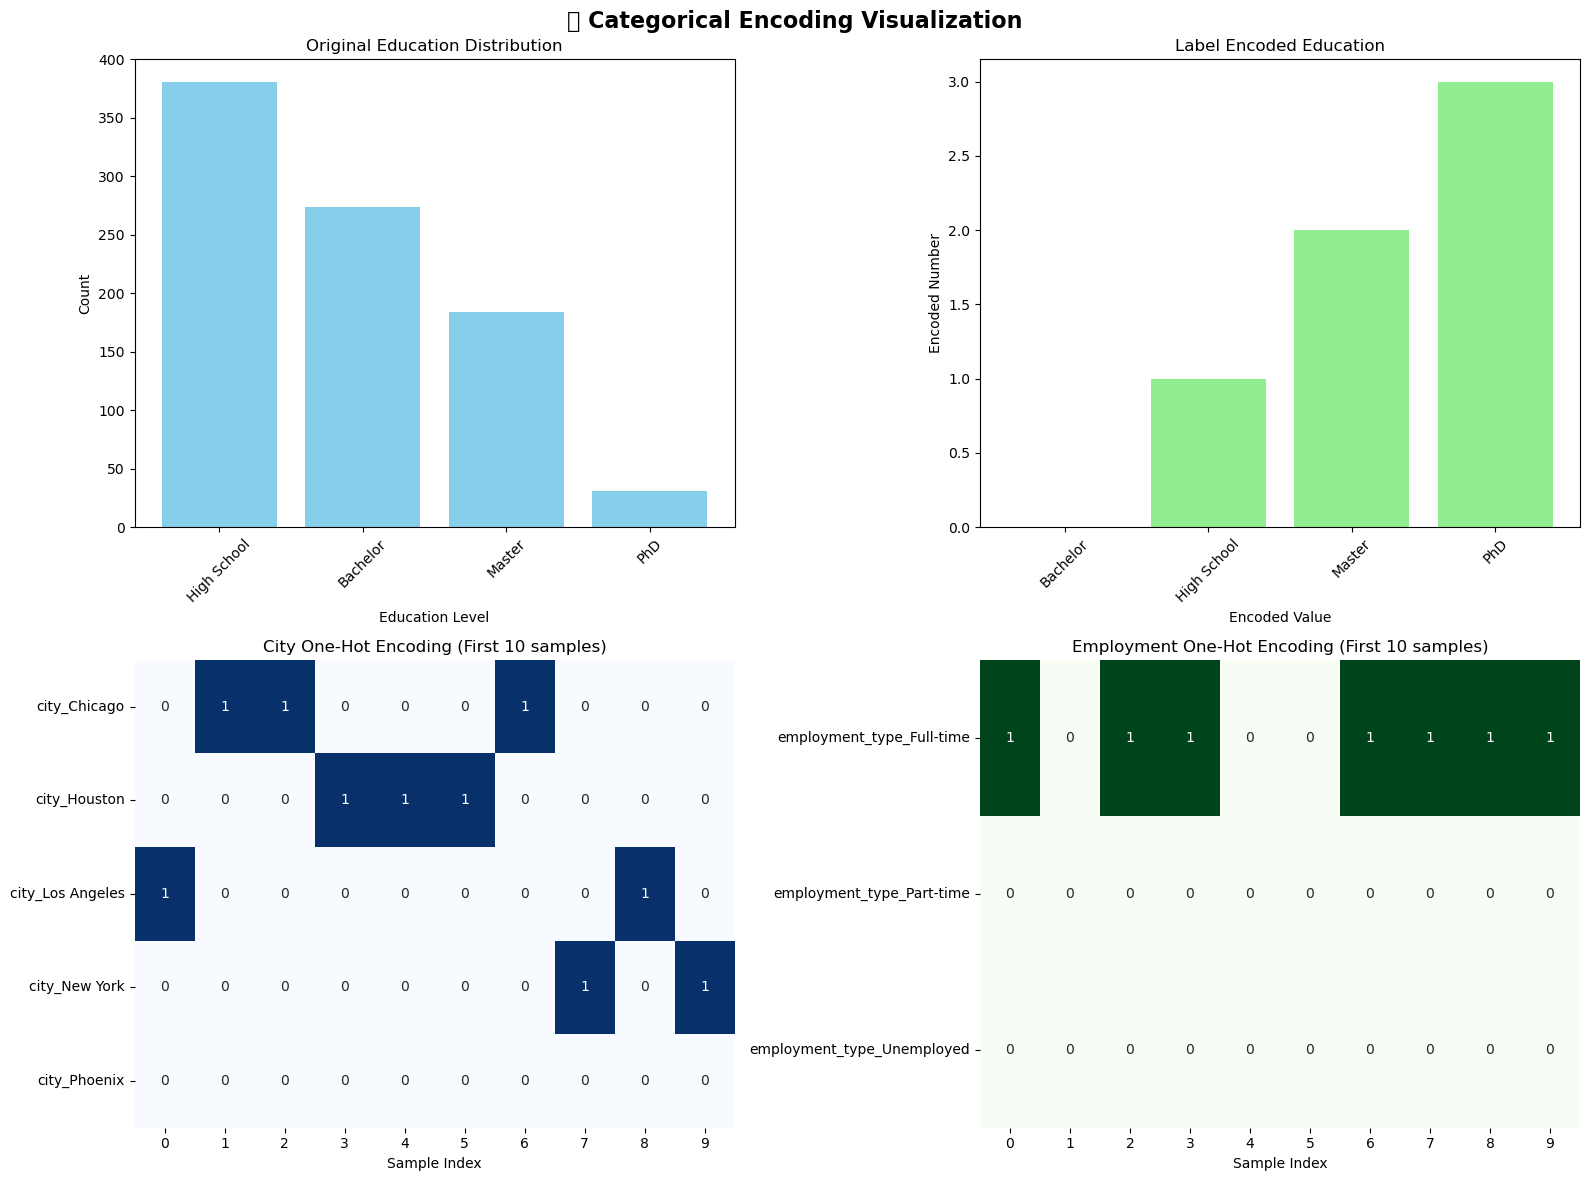

📏 ENCODING IMPACT ON DATASET SIZE
----------------------------------------
Original categorical data shape: (870, 3)
After encoding shape: (870, 9)
Columns increased from 3 to 9

Encoding Methods Comparison:


,Method,Original Columns,Encoded Columns,Use Case
0,Label Encoding,1,1,Ordinal data
1,One-Hot Encoding,1,5,Nominal data
2,One-Hot (with drop),1,3,Nominal data (avoid multicollinearity)



✅ Categorical encoding demonstration complete!


In [9]:
# 🏷️ Categorical Encoding - Live Demo

print("🔄 CATEGORICAL VARIABLE ENCODING")
print("=" * 50)

# Create a clean dataset for encoding
df_encoding = df.copy()
df_encoding = df_encoding.dropna()  # Remove missing values for cleaner demo

# Show current categorical columns
categorical_cols = ['education', 'city', 'employment_type']
print("Categorical columns to encode:")
for col in categorical_cols:
    print(f"{col}: {df_encoding[col].unique()}")
print()

# Method 1: Label Encoding (for ordinal data)
print("📊 METHOD 1: LABEL ENCODING")
print("-" * 30)

# Education is ordinal (has natural order)
education_order = ['High School', 'Bachelor', 'Master', 'PhD']
label_encoder = LabelEncoder()

# Fit and transform education
df_encoding['education_label'] = label_encoder.fit_transform(df_encoding['education'])

print("Education Label Encoding:")
education_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
for original, encoded in education_mapping.items():
    print(f"  {original} → {encoded}")
print()

# Method 2: One-Hot Encoding (for nominal data)
print("📊 METHOD 2: ONE-HOT ENCODING")
print("-" * 35)

# City is nominal (no natural order)
city_onehot = pd.get_dummies(df_encoding['city'], prefix='city')
print("City One-Hot Encoding:")
print(f"Original cities: {df_encoding['city'].unique()}")
print(f"New columns: {list(city_onehot.columns)}")
print("Sample of one-hot encoded data:")
display(city_onehot.head(3))
print()

# Method 3: Using Scikit-learn OneHotEncoder
print("📊 METHOD 3: SCIKIT-LEARN ONE-HOT ENCODER")
print("-" * 45)

onehot_encoder = OneHotEncoder(sparse_output=False, drop='first')  # drop='first' to avoid dummy trap
employment_encoded = onehot_encoder.fit_transform(df_encoding[['employment_type']])

# Create column names
feature_names = onehot_encoder.get_feature_names_out(['employment_type'])
employment_onehot_df = pd.DataFrame(employment_encoded, columns=feature_names, index=df_encoding.index)

print("Employment Type One-Hot Encoding (with drop='first'):")
print("Original categories:", df_encoding['employment_type'].unique())
print("Encoded columns:", list(employment_onehot_df.columns))
print("Sample of encoded data:")
display(employment_onehot_df.head(3))
print()

# Visualization of encoding results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🏷️ Categorical Encoding Visualization', fontsize=16, fontweight='bold')

# Original education distribution
edu_counts = df_encoding['education'].value_counts()
axes[0,0].bar(edu_counts.index, edu_counts.values, color='skyblue')
axes[0,0].set_title('Original Education Distribution')
axes[0,0].set_xlabel('Education Level')
axes[0,0].set_ylabel('Count')
axes[0,0].tick_params(axis='x', rotation=45)

# Label encoded education
axes[0,1].bar(range(len(education_mapping)), list(education_mapping.values()), color='lightgreen')
axes[0,1].set_title('Label Encoded Education')
axes[0,1].set_xlabel('Encoded Value')
axes[0,1].set_ylabel('Encoded Number')
axes[0,1].set_xticks(range(len(education_mapping)))
axes[0,1].set_xticklabels(list(education_mapping.keys()), rotation=45)

# City one-hot heatmap
city_sample = city_onehot.head(10)
sns.heatmap(city_sample.T, annot=True, cmap='Blues', cbar=False, ax=axes[1,0])
axes[1,0].set_title('City One-Hot Encoding (First 10 samples)')
axes[1,0].set_xlabel('Sample Index')

# Employment one-hot heatmap
emp_sample = employment_onehot_df.head(10)
sns.heatmap(emp_sample.T, annot=True, cmap='Greens', cbar=False, ax=axes[1,1])
axes[1,1].set_title('Employment One-Hot Encoding (First 10 samples)')
axes[1,1].set_xlabel('Sample Index')

plt.tight_layout()
plt.show()

# Compare dataset sizes
print("📏 ENCODING IMPACT ON DATASET SIZE")
print("-" * 40)

original_shape = df_encoding[categorical_cols].shape
print(f"Original categorical data shape: {original_shape}")

# After all encodings
all_encoded_cols = (['education_label'] + 
                list(city_onehot.columns) + 
                list(employment_onehot_df.columns))

print(f"After encoding shape: ({len(df_encoding)}, {len(all_encoded_cols)})")
print(f"Columns increased from {len(categorical_cols)} to {len(all_encoded_cols)}")

# Encoding comparison table
encoding_comparison = pd.DataFrame({
    'Method': ['Label Encoding', 'One-Hot Encoding', 'One-Hot (with drop)'],
    'Original Columns': [1, 1, 1],
    'Encoded Columns': [1, len(city_onehot.columns), len(employment_onehot_df.columns)],
    'Use Case': ['Ordinal data', 'Nominal data', 'Nominal data (avoid multicollinearity)']
})

print("\nEncoding Methods Comparison:")
display(encoding_comparison)

print("\n✅ Categorical encoding demonstration complete!")

<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #20c997, #28a745); color: white; border-radius: 8px; margin: 10px 0;">
    ⚖️ 6. Feature Scaling
</summary>

<div style="padding: 20px; background: rgba(32, 201, 151, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Normalize feature ranges to prevent algorithms from being biased toward features with larger scales.

### **🎯 When Needed**
<div style="background: rgba(32, 201, 151, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

**✅ Scaling Required:**
- **Distance-based algorithms:** KNN, K-Means, SVM
- **Gradient-based algorithms:** Neural Networks, Logistic Regression
- **Regularized algorithms:** Ridge, Lasso, Elastic Net

**❌ Scaling NOT Needed:**
- **Tree-based algorithms:** Random Forest, Decision Trees, XGBoost

</div>

### **📏 Scaling Methods**

#### **1️⃣ MinMaxScaler**
- **Range:** [0, 1]
- **Formula:** (x - min) / (max - min)
- **Best for:** Bounded data, when you know min/max

#### **2️⃣ StandardScaler (Z-score)**
- **Range:** Mean=0, Std=1
- **Formula:** (x - mean) / std
- **Best for:** Normally distributed data

#### **3️⃣ RobustScaler**
- **Uses:** Median and IQR instead of mean and std
- **Best for:** Data with outliers

### **⚠️ Critical Rule**
<div style="background: rgba(220, 53, 69, 0.1); border-left: 4px solid #dc3545; padding: 15px; margin: 15px 0;">

**⚠️ Remember:** Always fit the scaler on training data only, then transform both training and test data to prevent data leakage!


</div>

### **🎯 Choosing the Right Scaler**

<div style="background: rgba(23, 162, 184, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

| **Scaler** | **Best For** | **Pros** | **Cons** |
|------------|-------------|----------|----------|
| **MinMaxScaler** | Bounded features, uniform distribution | Fixed range [0,1], preserves relationships | Sensitive to outliers |
| **StandardScaler** | Normal distribution, no outliers | Centers data, unit variance | Assumes normal distribution |
| **RobustScaler** | Features with outliers | Robust to outliers | May not scale to [0,1] |

</div>


</div>

</div>
</details>

📏 FEATURE SCALING DEMONSTRATION
Original data statistics:


,age,income,credit_score,years_employed
count,870.000000,870.000000,870.000000,870.000000
mean,49.703448,59447.942600,579.786207,4.882950
std,18.163985,42485.172809,159.150392,4.697719
min,18.000000,-21364.105987,300.000000,-5.721424
25%,34.000000,38648.252384,442.250000,1.534977
50%,50.000000,52881.528673,576.000000,3.598947
75%,66.000000,67720.355064,720.000000,6.953832
max,79.000000,368869.145954,849.000000,28.131738



Training set shape: (696, 4)
Test set shape: (174, 4)

📊 METHOD 1: MINMAX SCALING
------------------------------
MinMax scaled data statistics (Training):


,age,income,credit_score,years_employed
count,696.000000,696.000000,696.000000,696.000000
mean,0.520633,0.207093,0.500879,0.312538
std,0.296068,0.113038,0.288076,0.139209
min,0.000000,0.000000,0.000000,0.000000
25%,0.262295,0.149899,0.249545,0.212051
50%,0.524590,0.187267,0.491803,0.274734
75%,0.786885,0.227586,0.756375,0.373404
max,1.000000,1.000000,1.000000,1.000000



📊 METHOD 2: STANDARD SCALING
-----------------------------------
Standard scaled data statistics (Training):


,age,income,credit_score,years_employed
count,6.960000e+02,6.960000e+02,6.960000e+02,6.960000e+02
mean,-8.294770e-17,-1.531342e-16,2.297013e-17,5.104474e-17
std,1.000719e+00,1.000719e+00,1.000719e+00,1.000719e+00
min,-1.759756e+00,-1.833382e+00,-1.739955e+00,-2.246716e+00
25%,-8.731907e-01,-5.063414e-01,-8.730866e-01,-7.223593e-01
50%,1.337491e-02,-1.755211e-01,-3.152843e-02,-2.717554e-01
75%,8.999405e-01,1.814231e-01,8.875417e-01,4.375447e-01
max,1.620275e+00,7.019538e+00,1.733846e+00,4.941913e+00



📊 METHOD 3: ROBUST SCALING
------------------------------
Robust scaled data statistics (Training):


,age,income,credit_score,years_employed
count,696.000000,696.000000,696.000000,696.000000
mean,-0.007543,0.255205,0.017907,0.234291
std,0.564380,1.455032,0.568388,0.862760
min,-1.000000,-2.410506,-0.970350,-1.702693
25%,-0.500000,-0.481008,-0.477987,-0.388484
50%,0.000000,0.000000,0.000000,0.000000
75%,0.500000,0.518992,0.522013,0.611516
max,0.906250,10.461516,1.002695,4.494914


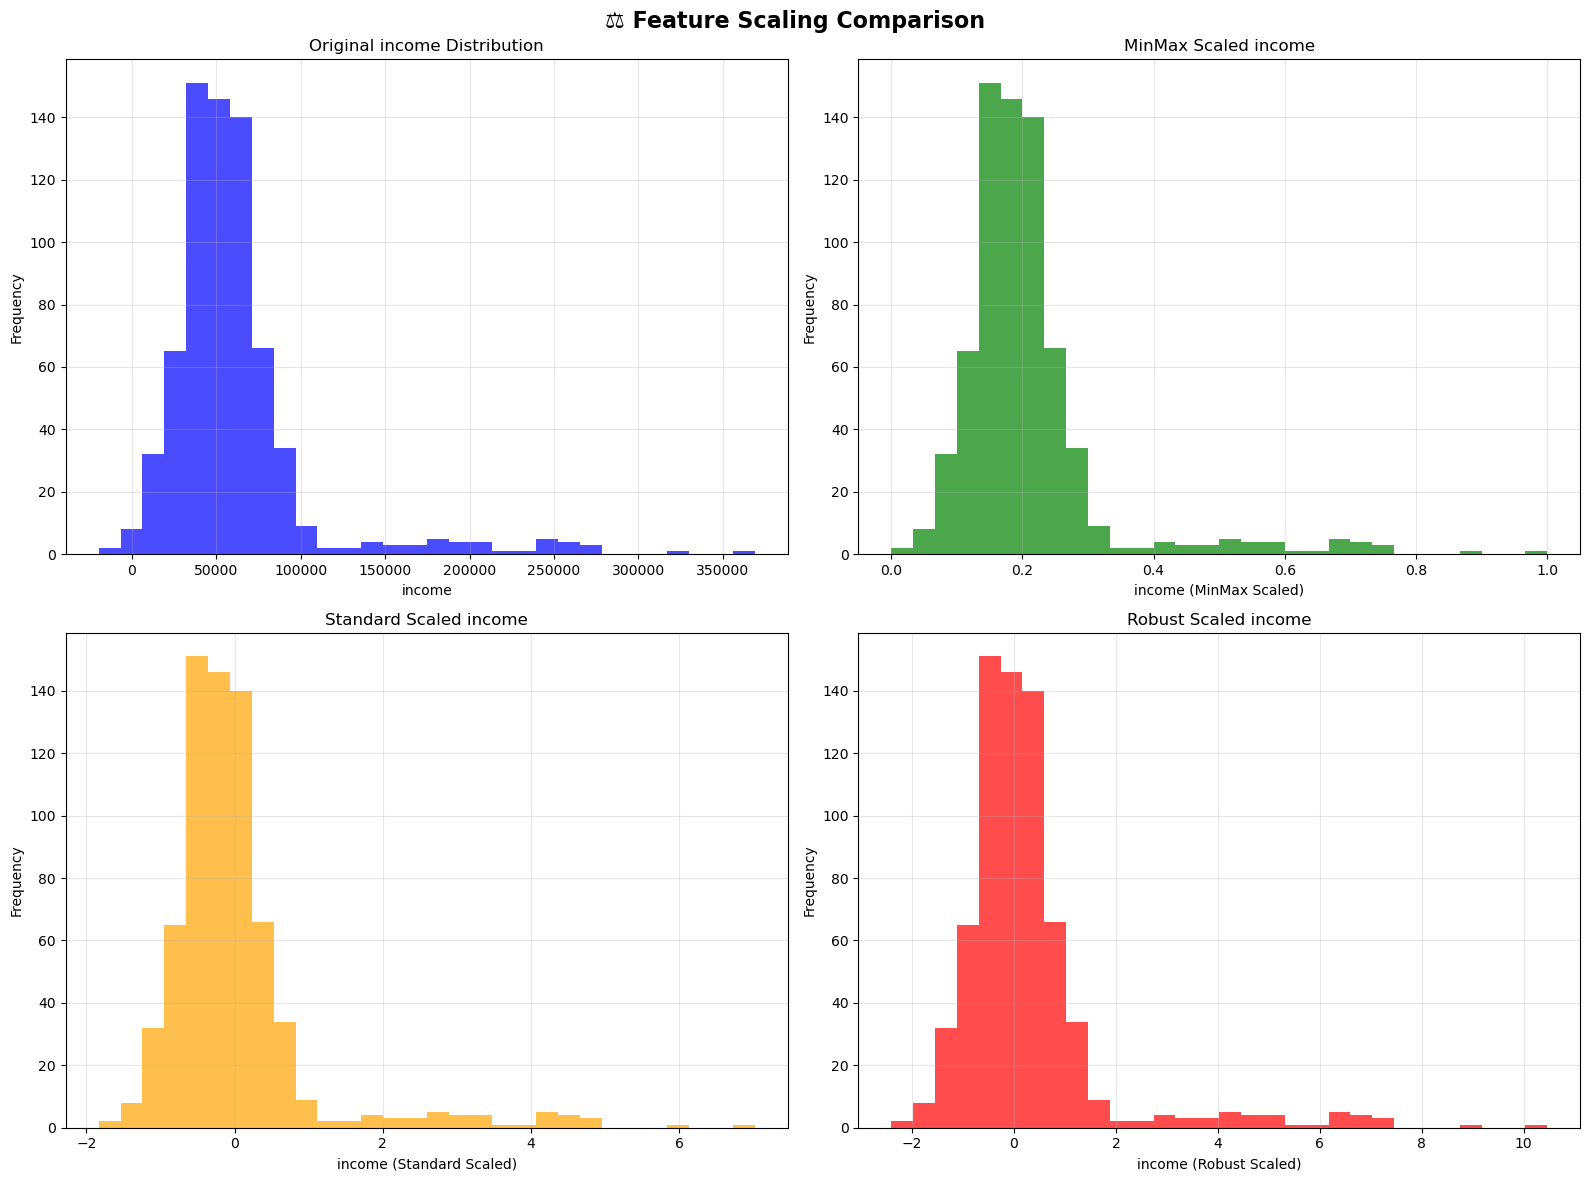

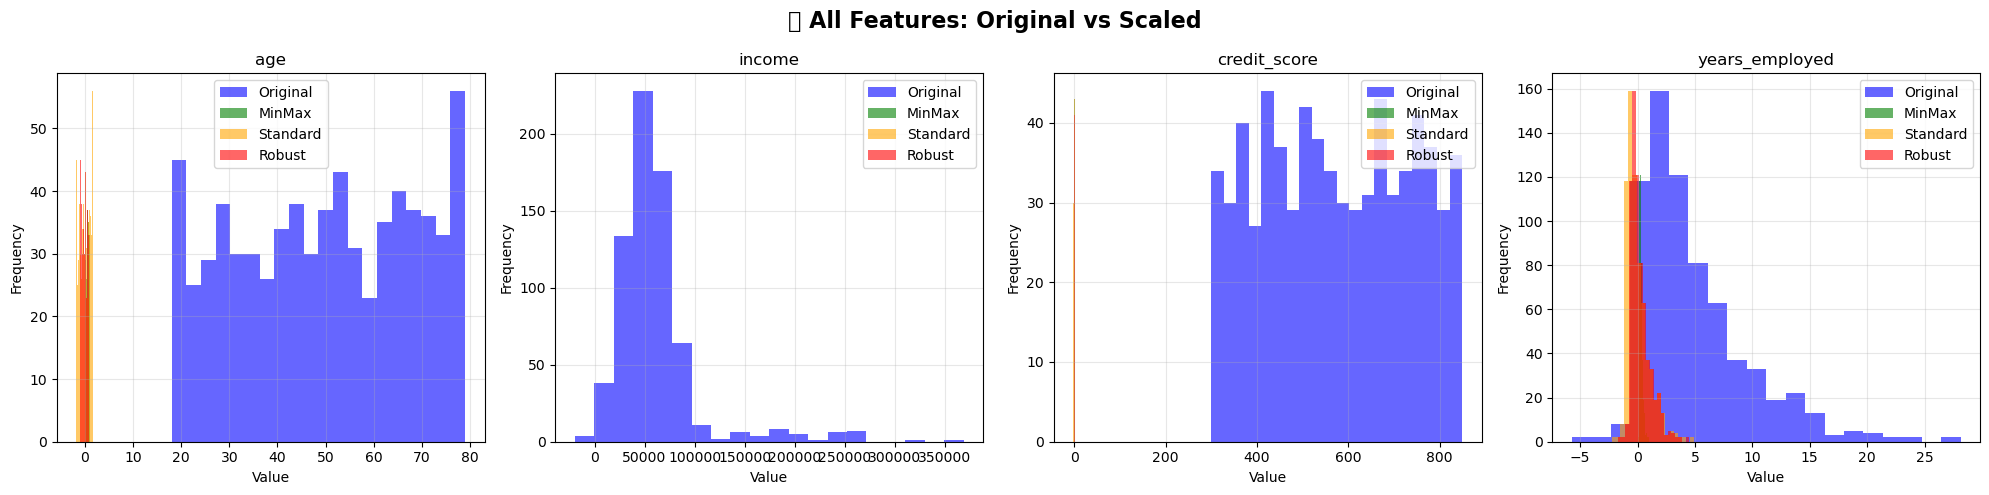

📊 SCALING METHODS COMPARISON:


,Method,Income Mean,Income Std,Income Min,Income Max
0,Original,60878.448,43907.761,-19563.384,368869.146
1,MinMax,0.207,0.113,0.000,1.000
2,Standard,-0.000,1.001,-1.833,7.020
3,Robust,0.255,1.455,-2.411,10.462



✅ Feature scaling demonstration complete!
💡 Remember: Always fit scalers on training data only!


In [13]:
# ⚖️ Feature Scaling - Live Demo

print("📏 FEATURE SCALING DEMONSTRATION")
print("=" * 50)

# Prepare clean numerical data
df_scaling = df.copy()
df_scaling = df_scaling.dropna()

# Select numerical features for scaling
numerical_features = ['age', 'income', 'credit_score', 'years_employed']
X_numerical = df_scaling[numerical_features]

print("Original data statistics:")
display(X_numerical.describe())
print()

# Split data to demonstrate proper scaling technique
X_train, X_test, y_train, y_test = train_test_split(
    X_numerical, df_scaling['loan_approved'], 
    test_size=0.2, random_state=42
)

print(f"Training set shape: {X_train.shape}")
print(f"Test set shape: {X_test.shape}")
print()

# Method 1: MinMax Scaling
print("📊 METHOD 1: MINMAX SCALING")
print("-" * 30)

minmax_scaler = MinMaxScaler()
# IMPORTANT: Fit only on training data!
minmax_scaler.fit(X_train)

# Transform both training and test data
X_train_minmax = pd.DataFrame(
    minmax_scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_minmax = pd.DataFrame(
    minmax_scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("MinMax scaled data statistics (Training):")
display(X_train_minmax.describe())
print()

# Method 2: Standard Scaling
print("📊 METHOD 2: STANDARD SCALING")
print("-" * 35)

standard_scaler = StandardScaler()
standard_scaler.fit(X_train)

X_train_standard = pd.DataFrame(
    standard_scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_standard = pd.DataFrame(
    standard_scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("Standard scaled data statistics (Training):")
display(X_train_standard.describe())
print()

# Method 3: Robust Scaling
print("📊 METHOD 3: ROBUST SCALING")
print("-" * 30)

robust_scaler = RobustScaler()
robust_scaler.fit(X_train)

X_train_robust = pd.DataFrame(
    robust_scaler.transform(X_train),
    columns=X_train.columns,
    index=X_train.index
)

X_test_robust = pd.DataFrame(
    robust_scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)

print("Robust scaled data statistics (Training):")
display(X_train_robust.describe())
print()

# Visualization of scaling effects
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('⚖️ Feature Scaling Comparison', fontsize=16, fontweight='bold')

# Select one feature for detailed comparison
feature_to_compare = 'income'

# Original distribution
axes[0,0].hist(X_train[feature_to_compare], bins=30, alpha=0.7, color='blue', label='Original')
axes[0,0].set_title(f'Original {feature_to_compare} Distribution')
axes[0,0].set_xlabel(feature_to_compare)
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# MinMax scaled
axes[0,1].hist(X_train_minmax[feature_to_compare], bins=30, alpha=0.7, color='green', label='MinMax')
axes[0,1].set_title(f'MinMax Scaled {feature_to_compare}')
axes[0,1].set_xlabel(f'{feature_to_compare} (MinMax Scaled)')
axes[0,1].set_ylabel('Frequency')
axes[0,1].grid(True, alpha=0.3)

# Standard scaled
axes[1,0].hist(X_train_standard[feature_to_compare], bins=30, alpha=0.7, color='orange', label='Standard')
axes[1,0].set_title(f'Standard Scaled {feature_to_compare}')
axes[1,0].set_xlabel(f'{feature_to_compare} (Standard Scaled)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].grid(True, alpha=0.3)

# Robust scaled
axes[1,1].hist(X_train_robust[feature_to_compare], bins=30, alpha=0.7, color='red', label='Robust')
axes[1,1].set_title(f'Robust Scaled {feature_to_compare}')
axes[1,1].set_xlabel(f'{feature_to_compare} (Robust Scaled)')
axes[1,1].set_ylabel('Frequency')
axes[1,1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Compare all features side by side
fig, axes = plt.subplots(1, 4, figsize=(20, 5))
fig.suptitle('📊 All Features: Original vs Scaled', fontsize=16, fontweight='bold')

methods = {
    'Original': X_train,
    'MinMax': X_train_minmax,
    'Standard': X_train_standard,
    'Robust': X_train_robust
}

colors = ['blue', 'green', 'orange', 'red']

for i, feature in enumerate(numerical_features):
    for j, (method_name, data) in enumerate(methods.items()):
        axes[i].hist(data[feature], bins=20, alpha=0.6, 
                    color=colors[j], label=method_name)
    
    axes[i].set_title(f'{feature}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')
    axes[i].legend()
    axes[i].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Scaling comparison table
scaling_comparison = pd.DataFrame({
    'Method': ['Original', 'MinMax', 'Standard', 'Robust'],
    'Income Mean': [
        X_train['income'].mean(),
        X_train_minmax['income'].mean(),
        X_train_standard['income'].mean(),
        X_train_robust['income'].mean()
    ],
    'Income Std': [
        X_train['income'].std(),
        X_train_minmax['income'].std(),
        X_train_standard['income'].std(),
        X_train_robust['income'].std()
    ],
    'Income Min': [
        X_train['income'].min(),
        X_train_minmax['income'].min(),
        X_train_standard['income'].min(),
        X_train_robust['income'].min()
    ],
    'Income Max': [
        X_train['income'].max(),
        X_train_minmax['income'].max(),
        X_train_standard['income'].max(),
        X_train_robust['income'].max()
    ]
})

print("📊 SCALING METHODS COMPARISON:")
display(scaling_comparison.round(3))

print("\n✅ Feature scaling demonstration complete!")
print("💡 Remember: Always fit scalers on training data only!")

<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #fd7e14, #e83e8c); color: white; border-radius: 8px; margin: 10px 0;">
    🛠️ 7. Feature Engineering
</summary>

<div style="padding: 20px; background: rgba(253, 126, 20, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Create new features from existing ones to improve model performance and capture domain knowledge.

### **🎯 Common Techniques**

#### **1️⃣ Mathematical Operations**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Ratios:** income/expense, price/sqft
- **Differences:** current_price - previous_price  
- **Products:** length × width for area
- **Powers:** x², √x for non-linear relationships

</div>

#### **2️⃣ Date/Time Features**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Extract:** year, month, day, hour, day_of_week
- **Create:** is_weekend, is_holiday, days_since_event
- **Cyclical:** sin/cos transformations for hours, months

</div>

#### **3️⃣ Text Features**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Length:** character count, word count
- **Patterns:** email domains, phone area codes
- **Sentiment:** positive/negative scoring

</div>

#### **4️⃣ Binning/Discretization**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Age groups:** 0-18, 19-35, 36-50, 50+
- **Income brackets:** Low, Medium, High
- **Performance tiers:** A, B, C grades

</div>

#### **5️⃣ Polynomial Features**
<div style="background: rgba(253, 126, 20, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Powers:** x², x³ for non-linear patterns
- **Interactions:** x₁×x₂ for feature combinations

</div>

### **🔧 Advanced Tools**
<div style="background: rgba(23, 162, 184, 0.1); border-left: 4px solid #17a2b8; padding: 15px; margin: 15px 0;">

👍 You can also use **Featuretools** for automatic feature engineering

</div>

### **💡 Feature Engineering Tips**

<div style="background: rgba(40, 167, 69, 0.1); border-left: 4px solid #28a745; padding: 15px; margin: 15px 0;">

**✅ Best Practices:**
- **Domain Knowledge:** Use business understanding to create meaningful features
- **Validation:** Always validate new features improve model performance  
- **Correlation Check:** Remove highly correlated engineered features
- **Feature Importance:** Use tree-based models to identify valuable features

</div>

</div>
</details>

🔨 FEATURE ENGINEERING DEMONSTRATION
Starting with 870 samples and 9 features
Original features: ['age', 'income', 'credit_score', 'years_employed', 'education', 'city', 'employment_type', 'job_description', 'loan_approved']

📊 MATHEMATICAL FEATURE ENGINEERING
----------------------------------------
✅ Created 7 mathematical features:
   - income_to_age_ratio
   - credit_to_income_ratio
   - income_above_median
   - credit_above_average
   - experience_income_product
   - age_squared
   - income_log

📊 BINNING & DISCRETIZATION
-----------------------------------
✅ Created 4 binned features:
   - age_group: {'Elder': 221, 'Middle': 214, 'Senior': 203, 'Adult': 125, 'Young': 107}
   - income_bracket: {'Low': 218, 'Very High': 218, 'Medium': 217, 'High': 217}
   - credit_category: {'Poor': 445, 'Excellent': 180, 'Fair': 125, 'Good': 120}
   - employment_length: {'Experienced': 402, 'Veteran': 204, 'New': 139, 'Expert': 112}

📊 BOOLEAN FEATURE ENGINEERING
-----------------------------------

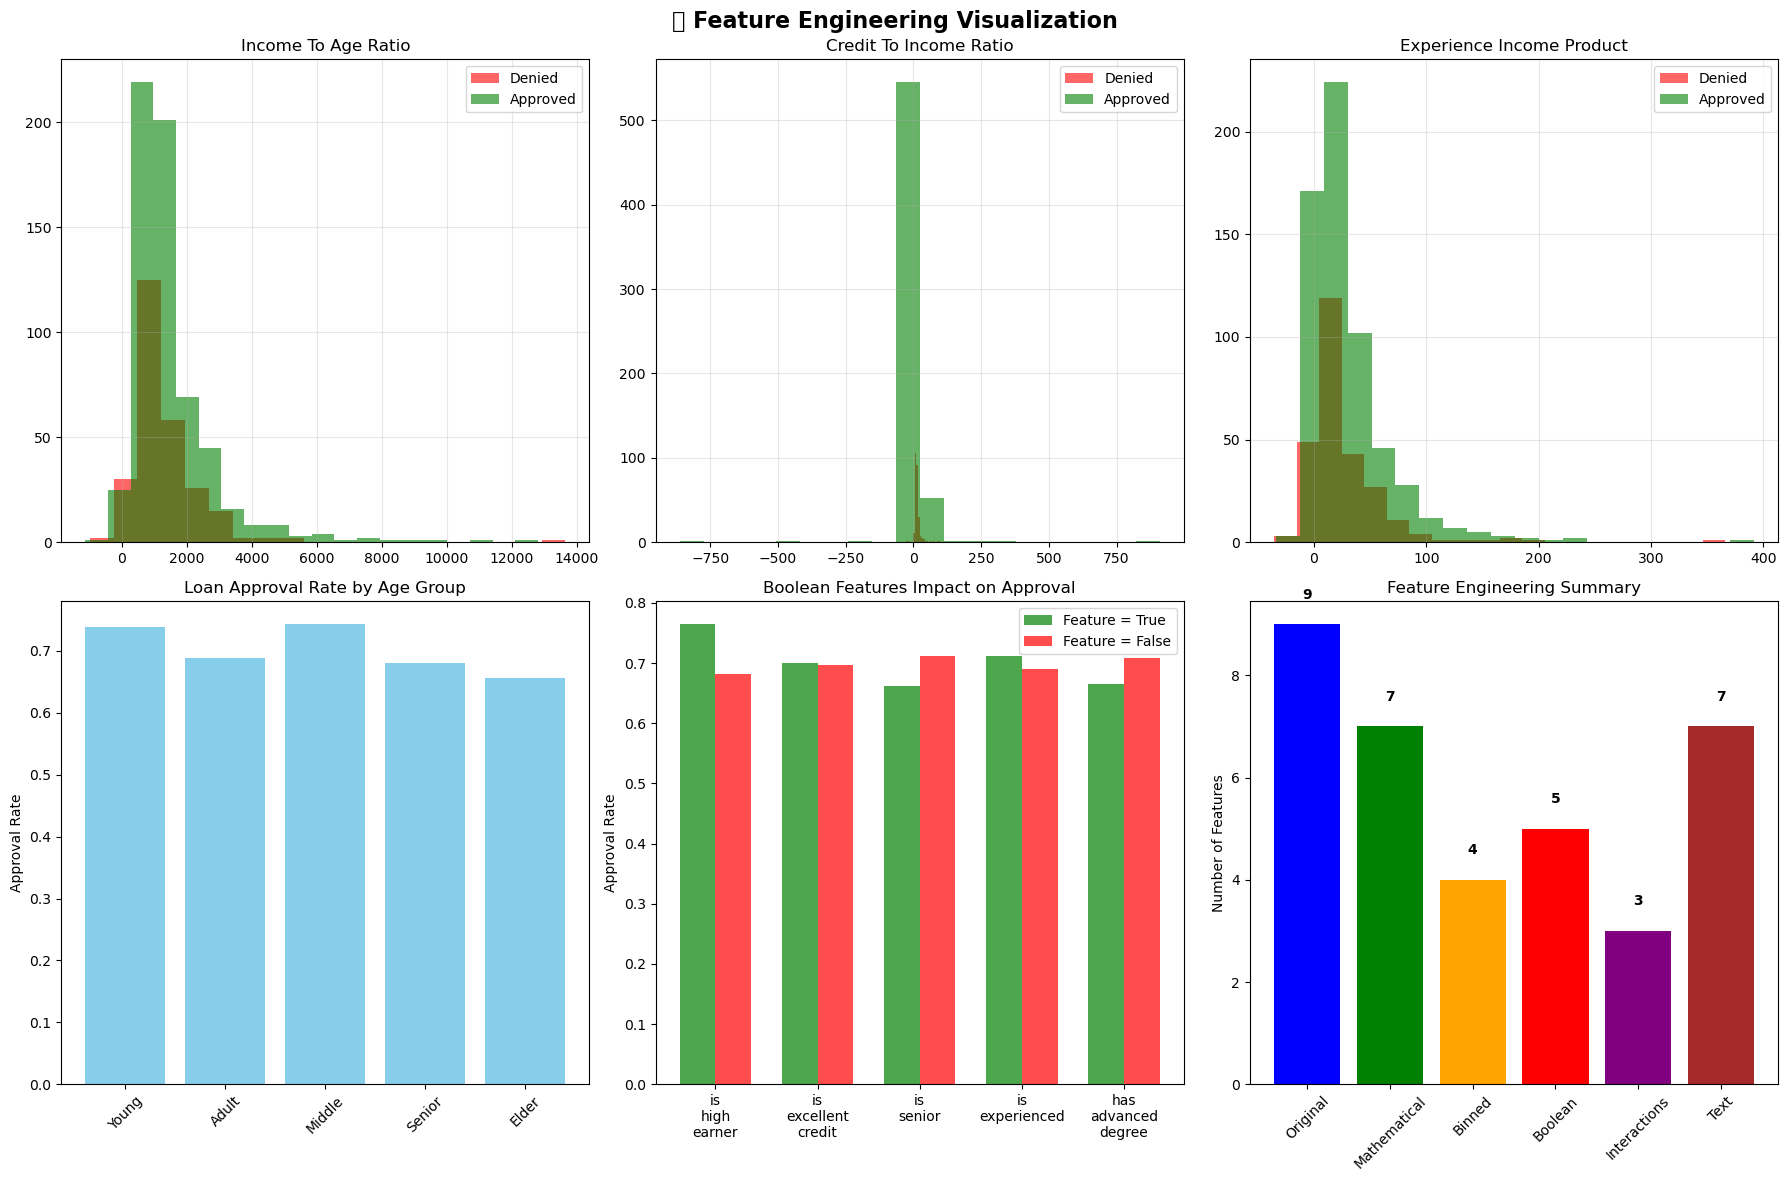

🎯 FEATURE ENGINEERING SUMMARY
----------------------------------------
Original features: 9
New engineered features: 26
Mathematical operations: 7
Binning/Discretization: 4
Boolean indicators: 5
Interaction terms: 3
Text features: 7
Total features after engineering: 35

✅ Feature engineering demonstration complete!
💡 Remember: More features aren't always better - quality over quantity!


In [14]:
# 🛠️ Feature Engineering - Live Demo

print("🔨 FEATURE ENGINEERING DEMONSTRATION")
print("=" * 50)

# Create a clean dataset for feature engineering
df_fe = df.copy()
df_fe = df_fe.dropna()  # Remove missing values for cleaner demo

print(f"Starting with {len(df_fe)} samples and {len(df_fe.columns)} features")
print("Original features:", list(df_fe.columns))
print()

# 1. Mathematical Operations
print("📊 MATHEMATICAL FEATURE ENGINEERING")
print("-" * 40)

# Create ratio features
df_fe['income_to_age_ratio'] = df_fe['income'] / df_fe['age']
df_fe['credit_to_income_ratio'] = df_fe['credit_score'] / (df_fe['income'] / 1000)  # Scale income

# Create difference features
df_fe['income_above_median'] = df_fe['income'] - df_fe['income'].median()
df_fe['credit_above_average'] = df_fe['credit_score'] - df_fe['credit_score'].mean()

# Create product features (assuming area = length × width simulation)
df_fe['experience_income_product'] = df_fe['years_employed'] * (df_fe['income'] / 10000)

# Create power features
df_fe['age_squared'] = df_fe['age'] ** 2
df_fe['income_log'] = np.log1p(df_fe['income'])  # log1p handles zeros better

mathematical_features = ['income_to_age_ratio', 'credit_to_income_ratio', 'income_above_median', 
                        'credit_above_average', 'experience_income_product', 'age_squared', 'income_log']

print(f"✅ Created {len(mathematical_features)} mathematical features:")
for feat in mathematical_features:
    print(f"   - {feat}")
print()

# 2. Binning/Discretization
print("📊 BINNING & DISCRETIZATION")
print("-" * 35)

# Age groups
df_fe['age_group'] = pd.cut(df_fe['age'], bins=[0, 25, 35, 50, 65, 100], labels=['Young', 'Adult', 'Middle', 'Senior', 'Elder'])

# Income brackets using quantiles
df_fe['income_bracket'] = pd.qcut(df_fe['income'], q=4, labels=['Low', 'Medium', 'High', 'Very High'])

# Credit score categories
df_fe['credit_category'] = pd.cut(df_fe['credit_score'],bins=[0, 580, 670, 740, 850],labels=['Poor', 'Fair', 'Good', 'Excellent'])

# Years employed categories
df_fe['employment_length'] = pd.cut(df_fe['years_employed'],bins=[-1, 1, 5, 10, np.inf],labels=['New', 'Experienced', 'Veteran', 'Expert'])

binning_features = ['age_group', 'income_bracket', 'credit_category', 'employment_length']

print(f"✅ Created {len(binning_features)} binned features:")
for feat in binning_features:
    print(f"   - {feat}: {df_fe[feat].value_counts().to_dict()}")
print()

# 3. Boolean/Binary Features
print("📊 BOOLEAN FEATURE ENGINEERING")
print("-" * 40)

# Create binary indicators
df_fe['is_high_earner'] = (df_fe['income'] > df_fe['income'].quantile(0.8)).astype(int)
df_fe['is_excellent_credit'] = (df_fe['credit_score'] >= 740).astype(int)
df_fe['is_senior'] = (df_fe['age'] >= 65).astype(int)
df_fe['is_experienced'] = (df_fe['years_employed'] >= 5).astype(int)
df_fe['has_advanced_degree'] = df_fe['education'].isin(['Master', 'PhD']).astype(int)

boolean_features = ['is_high_earner', 'is_excellent_credit', 'is_senior', 'is_experienced', 'has_advanced_degree']

print(f"✅ Created {len(boolean_features)} boolean features:")
for feat in boolean_features:
    print(f"   - {feat}: {df_fe[feat].sum()} positive cases ({df_fe[feat].mean()*100:.1f}%)")
print()

# 4. Polynomial Features (Interactions)
print("📊 POLYNOMIAL FEATURES (INTERACTIONS)")
print("-" * 45)

from sklearn.preprocessing import PolynomialFeatures

# Select a few numerical features for polynomial transformation
poly_cols = ['age', 'income', 'credit_score']
poly = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

# Create polynomial features
poly_features = poly.fit_transform(df_fe[poly_cols])
poly_feature_names = poly.get_feature_names_out(poly_cols)

# Create DataFrame with polynomial features
poly_df = pd.DataFrame(poly_features, columns=poly_feature_names, index=df_fe.index)

# Keep only interaction terms (not original features or squares)
interaction_cols = [col for col in poly_feature_names if ' ' in col]
interaction_features = poly_df[interaction_cols]

print(f"✅ Created {len(interaction_cols)} interaction features:")
for feat in interaction_cols:
    print(f"   - {feat}")
print()

# 5. Text Feature Engineering (on job_description)
print("📊 TEXT FEATURE ENGINEERING")
print("-" * 35)

# Basic text features
df_fe['job_desc_length'] = df_fe['job_description'].str.len()
df_fe['job_desc_word_count'] = df_fe['job_description'].str.split().str.len()

# Check for specific keywords
keywords = ['manager', 'senior', 'lead', 'director', 'analyst']
for keyword in keywords:
    df_fe[f'has_{keyword}'] = df_fe['job_description'].str.contains(keyword, case=False).astype(int)

text_features = ['job_desc_length', 'job_desc_word_count'] + [f'has_{keyword}' for keyword in keywords]

print(f"✅ Created {len(text_features)} text features:")
for feat in text_features:
    if 'has_' in feat:
        print(f"   - {feat}: {df_fe[feat].sum()} occurrences")
    else:
        print(f"   - {feat}: mean = {df_fe[feat].mean():.1f}")
print()

# Visualization of Feature Engineering Impact
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('🛠️ Feature Engineering Visualization', fontsize=16, fontweight='bold')

# 1. Mathematical features correlation with target
math_features_for_viz = ['income_to_age_ratio', 'credit_to_income_ratio', 'experience_income_product']
for i, feat in enumerate(math_features_for_viz):
    approved = df_fe[df_fe['loan_approved'] == 1][feat]
    denied = df_fe[df_fe['loan_approved'] == 0][feat]
    
    axes[0, i].hist(denied, bins=20, alpha=0.6, label='Denied', color='red')
    axes[0, i].hist(approved, bins=20, alpha=0.6, label='Approved', color='green')
    axes[0, i].set_title(f'{feat.replace("_", " ").title()}')
    axes[0, i].legend()
    axes[0, i].grid(True, alpha=0.3)

# 2. Binned features vs target
axes[1, 0].bar(df_fe['age_group'].cat.categories, df_fe.groupby('age_group')['loan_approved'].mean(),color='skyblue')
axes[1, 0].set_title('Loan Approval Rate by Age Group')
axes[1, 0].set_ylabel('Approval Rate')
axes[1, 0].tick_params(axis='x', rotation=45)

# 3. Boolean features impact
boolean_impact = pd.DataFrame({
    'Feature': boolean_features,
    'Approval_Rate_True': [df_fe[df_fe[feat] == 1]['loan_approved'].mean() for feat in boolean_features],
    'Approval_Rate_False': [df_fe[df_fe[feat] == 0]['loan_approved'].mean() for feat in boolean_features]
})

x_pos = np.arange(len(boolean_features))
width = 0.35

axes[1, 1].bar(x_pos - width/2, boolean_impact['Approval_Rate_True'], width, label='Feature = True', color='green', alpha=0.7)
axes[1, 1].bar(x_pos + width/2, boolean_impact['Approval_Rate_False'], width,label='Feature = False', color='red', alpha=0.7)
axes[1, 1].set_title('Boolean Features Impact on Approval')
axes[1, 1].set_ylabel('Approval Rate')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels([feat.replace('_', '\n') for feat in boolean_features], rotation=0)
axes[1, 1].legend()

# 4. Feature count comparison
feature_counts = {
    'Original': 9,  # Original features
    'Mathematical': len(mathematical_features),
    'Binned': len(binning_features),
    'Boolean': len(boolean_features),
    'Interactions': len(interaction_cols),
    'Text': len(text_features)
}

axes[1, 2].bar(feature_counts.keys(), feature_counts.values(), color=['blue', 'green', 'orange', 'red', 'purple', 'brown'])
axes[1, 2].set_title('Feature Engineering Summary')
axes[1, 2].set_ylabel('Number of Features')
axes[1, 2].tick_params(axis='x', rotation=45)

for i, v in enumerate(feature_counts.values()):
    axes[1, 2].text(i, v + 0.5, str(v), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Summary of feature engineering
total_new_features = (len(mathematical_features) + len(binning_features) + len(boolean_features) + len(interaction_cols) + len(text_features))

print("🎯 FEATURE ENGINEERING SUMMARY")
print("-" * 40)
print(f"Original features: {len(df.columns)}")
print(f"New engineered features: {total_new_features}")
print(f"Mathematical operations: {len(mathematical_features)}")
print(f"Binning/Discretization: {len(binning_features)}")
print(f"Boolean indicators: {len(boolean_features)}")
print(f"Interaction terms: {len(interaction_cols)}")
print(f"Text features: {len(text_features)}")
print(f"Total features after engineering: {len(df.columns) + total_new_features}")

print("\n✅ Feature engineering demonstration complete!")
print("💡 Remember: More features aren't always better - quality over quantity!")

<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #6f42c1, #e83e8c); color: white; border-radius: 8px; margin: 10px 0;">
    🎯 8. Feature Selection
</summary>

<div style="padding: 20px; background: rgba(111, 66, 193, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Select the most relevant features to improve model performance and reduce overfitting.

### **✅ Benefits**
<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- ✅ **Reduces overfitting**
- ✅ **Improves model interpretability**  
- ✅ **Decreases training time**
- ✅ **Reduces storage requirements**

</div>

### **🔍 Selection Methods**

#### **1️⃣ Filter Methods (Statistical)**
<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Correlation Matrix:** Remove highly correlated features (>0.95)
- **Chi-square Test:** For categorical features vs categorical target
- **ANOVA F-test:** For numerical features vs categorical target  
- **Mutual Information:** Measures dependency between features and target

</div>

#### **2️⃣ Wrapper Methods**
<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Recursive Feature Elimination (RFE):** Iteratively remove features
- **Forward/Backward Selection:** Add/remove features stepwise

</div>

#### **3️⃣ Embedded Methods**
<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **L1 Regularization (Lasso):** Automatically selects features
- **Tree-based Feature Importance:** From Random Forest, XGBoost

</div>

### **🔧 Advanced Tip**
<div style="background: rgba(23, 162, 184, 0.1); border-left: 4px solid #17a2b8; padding: 15px; margin: 15px 0;">

You can also use **SelectFromModel** with **Lasso** for automatic feature selection

</div>

### **📊 Feature Selection Comparison**

<div style="background: rgba(111, 66, 193, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

| **Method** | **Type** | **Best For** | **Pros** | **Cons** |
|------------|----------|--------------|----------|----------|
| **Correlation** | Filter | Linear relationships | Fast, simple | Misses non-linear relationships |
| **Chi-square** | Filter | Categorical features | Statistical significance | Only for categorical |
| **ANOVA F-test** | Filter | Numerical features | Statistical foundation | Assumes normal distribution |
| **RFE** | Wrapper | Any algorithm | Algorithm-specific | Computationally expensive |
| **Lasso** | Embedded | Linear models | Automatic selection | Linear assumptions |
| **Tree Importance** | Embedded | Tree models | Handles non-linearity | Model-specific |

</div>

</div>
</details>

🔍 FEATURE SELECTION DEMONSTRATION
Starting with 22 features for selection
Feature names: ['age', 'income', 'credit_score', 'years_employed', 'income_to_age_ratio', 'credit_to_income_ratio', 'experience_income_product', 'age_squared', 'income_log', 'is_high_earner', 'is_excellent_credit', 'is_senior', 'is_experienced', 'has_advanced_degree', 'education_encoded', 'city_Houston', 'city_Los Angeles', 'city_New York', 'city_Phoenix', 'emp_Full-time', 'emp_Part-time', 'emp_Unemployed']

📊 METHOD 1: CORRELATION ANALYSIS
----------------------------------------
Found 4 highly correlated feature pairs (>0.8):
  age ↔ age_squared: 0.986
  income ↔ income_log: 0.826
  age_squared ↔ is_senior: 0.830
  has_advanced_degree ↔ education_encoded: 0.850

After correlation filtering: 18 features (removed 4)

📊 METHOD 2: UNIVARIATE STATISTICAL TESTS
--------------------------------------------------
Top 10 features by ANOVA F-test:


,Feature,F_Score
8,emp_Part-time,7.461516
4,is_high_earner,4.596902
1,income,4.023209
7,emp_Full-time,3.593805
2,income_to_age_ratio,3.298730
9,emp_Unemployed,3.193863
0,age,2.850744
6,city_Phoenix,1.963485
3,experience_income_product,1.891098
5,has_advanced_degree,1.436684



📊 METHOD 3: RECURSIVE FEATURE ELIMINATION
--------------------------------------------------
RFE Selected Features (Top 8):
RFE Selected Features (Top 8):


,Feature,Selected,Ranking
0,age,True,1
1,income,True,1
2,credit_score,True,1
3,years_employed,True,1
4,income_to_age_ratio,True,1
5,credit_to_income_ratio,True,1
6,experience_income_product,True,1
16,emp_Part-time,True,1



📊 METHOD 4: TREE-BASED FEATURE IMPORTANCE
--------------------------------------------------
Top 10 features by Random Forest importance:
Top 10 features by Random Forest importance:


,Feature,Importance
5,credit_to_income_ratio,0.135848
3,years_employed,0.128339
6,experience_income_product,0.123403
2,credit_score,0.119363
4,income_to_age_ratio,0.117036
0,age,0.112450
1,income,0.110967
16,emp_Part-time,0.022574
10,has_advanced_degree,0.019795
13,city_New York,0.018473



📊 METHOD 5: L1 REGULARIZATION (LASSO)
---------------------------------------------
Lasso selected 6 features:


,Feature,Coefficient
5,emp_Part-time,-0.039873
1,years_employed,0.004881
0,age,-0.000929
4,experience_income_product,-0.000232
3,credit_to_income_ratio,0.000178
2,income_to_age_ratio,-0.000018


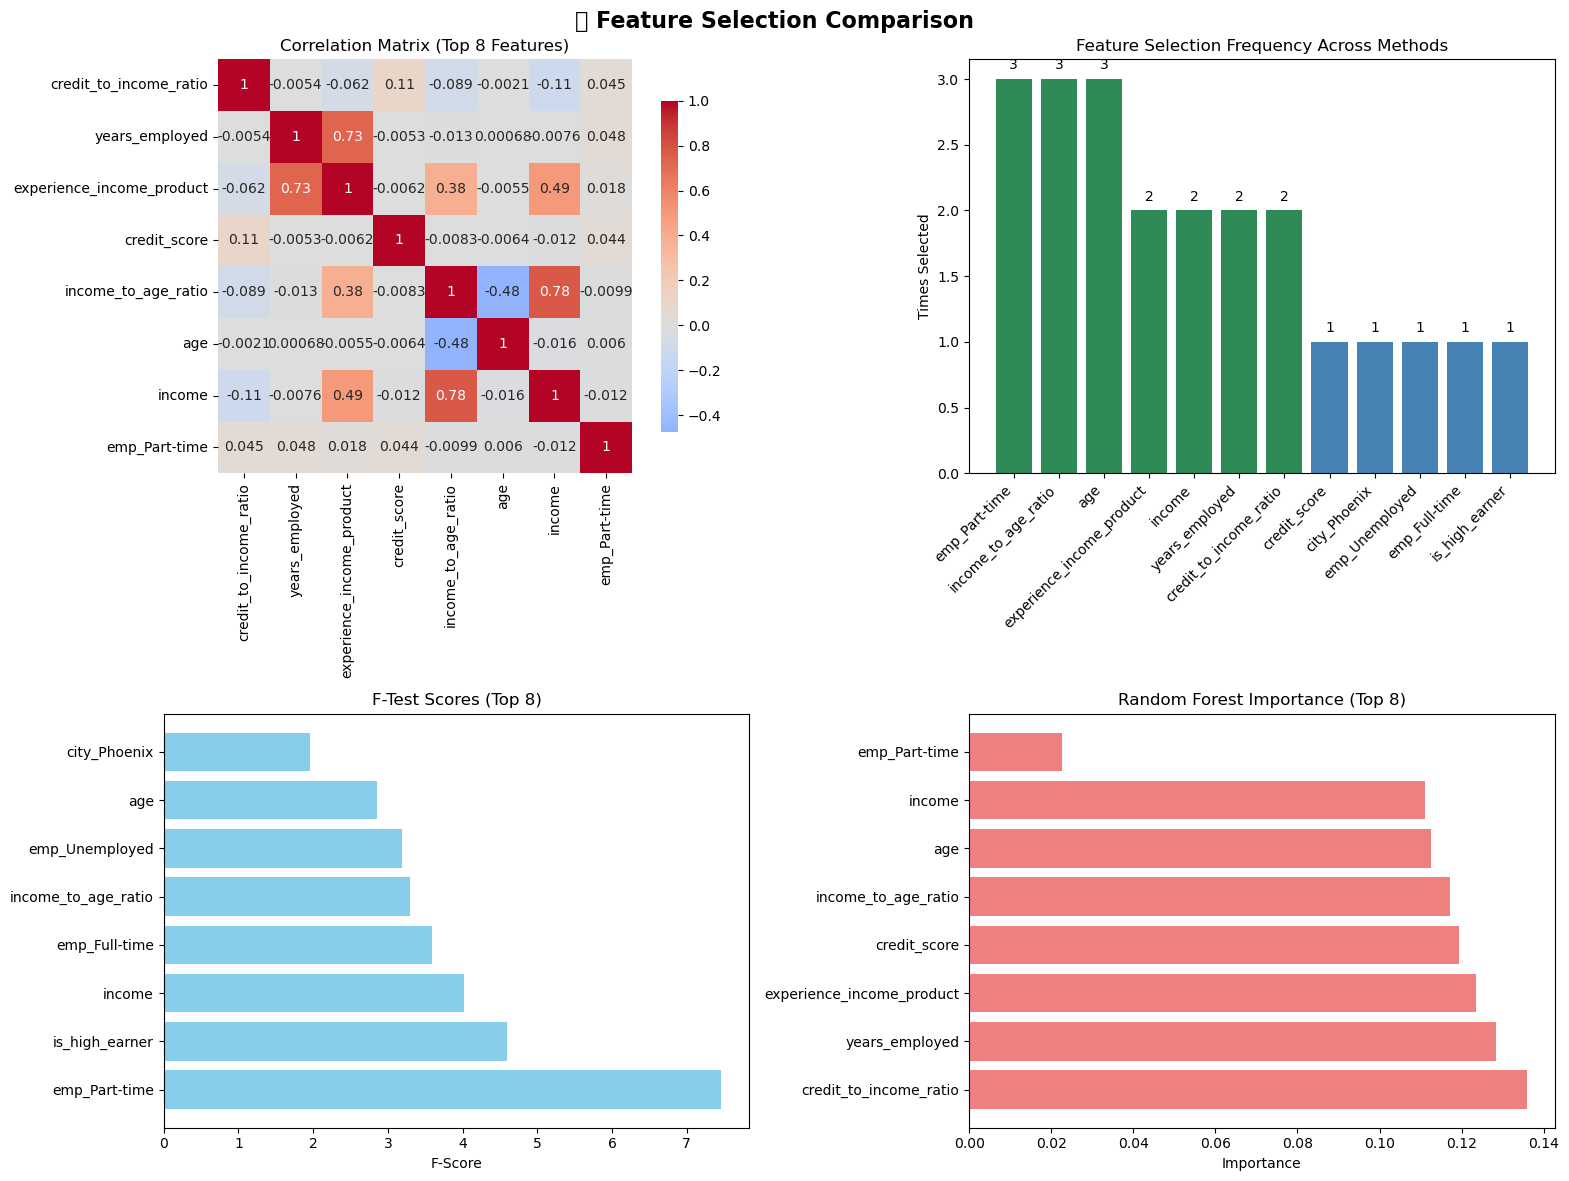


📋 FEATURE SELECTION SUMMARY
-----------------------------------


,Method,Features Selected,Key Strength
0,Correlation Filter,18,Removes redundancy
1,F-Test (k=10),10,"Fast, statistical significance"
2,RFE (k=8),8,Considers feature interactions
3,Random Forest,18,Non-linear relationships
4,Lasso,6,Automatic regularization



✅ Most consistently selected features across methods:
  1. emp_Part-time (selected by 3 methods)
  2. experience_income_product (selected by 2 methods)
  3. income (selected by 2 methods)
  4. income_to_age_ratio (selected by 3 methods)
  5. years_employed (selected by 2 methods)
  6. age (selected by 3 methods)
  7. credit_to_income_ratio (selected by 2 methods)

💡 Recommendation: Use 7 consensus features for optimal balance of performance and interpretability.


In [19]:
# 🎯 Feature Selection - Live Demo

print("🔍 FEATURE SELECTION DEMONSTRATION")
print("=" * 50)

# Use the feature-engineered dataset from previous section
# Create a comprehensive feature set for selection
df_fs = df_fe.copy()

# Prepare numerical features for selection
numerical_features_all = ['age', 'income', 'credit_score', 'years_employed',
                         'income_to_age_ratio', 'credit_to_income_ratio', 
                         'experience_income_product', 'age_squared', 'income_log']

# Encode categorical features for selection
# Education (ordinal)
df_fs['education_encoded'] = df_fs['education'].map({'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3})

# One-hot encode other categorical features
city_encoded = pd.get_dummies(df_fs['city'], prefix='city', drop_first=True)
employment_encoded = pd.get_dummies(df_fs['employment_type'], prefix='emp', drop_first=True)

# Combine all features
boolean_features_all = ['is_high_earner', 'is_excellent_credit', 'is_senior', 
                       'is_experienced', 'has_advanced_degree']

# Create final feature matrix
X_all = pd.concat([
    df_fs[numerical_features_all + boolean_features_all + ['education_encoded']],
    city_encoded,
    employment_encoded
], axis=1)

y_all = df_fs['loan_approved']

print(f"Starting with {X_all.shape[1]} features for selection")
print(f"Feature names: {list(X_all.columns)}")
print()

# Method 1: Correlation Analysis
print("📊 METHOD 1: CORRELATION ANALYSIS")
print("-" * 40)

# Calculate correlation matrix
corr_matrix = X_all.corr()

# Find highly correlated feature pairs
def find_high_correlations(corr_matrix, threshold=0.95):
    high_corr_pairs = []
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((corr_matrix.columns[i], corr_matrix.columns[j], corr_matrix.iloc[i, j]))
    return high_corr_pairs

high_corr_pairs = find_high_correlations(corr_matrix, 0.8)
print(f"Found {len(high_corr_pairs)} highly correlated feature pairs (>0.8):")
for feat1, feat2, corr_val in high_corr_pairs:
    print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")

# Remove one feature from each highly correlated pair
features_to_remove = set()
for feat1, feat2, _ in high_corr_pairs:
    features_to_remove.add(feat2)  # Remove the second feature

X_corr_filtered = X_all.drop(columns=list(features_to_remove))
print(f"\nAfter correlation filtering: {X_corr_filtered.shape[1]} features (removed {len(features_to_remove)})")
print()

# Method 2: Univariate Statistical Tests
print("📊 METHOD 2: UNIVARIATE STATISTICAL TESTS")
print("-" * 50)

from sklearn.feature_selection import f_classif, SelectKBest

# ANOVA F-test for numerical features vs categorical target
f_selector = SelectKBest(score_func=f_classif, k=10)
X_f_selected = f_selector.fit_transform(X_corr_filtered, y_all)

# Get selected feature names and scores
selected_features_f = X_corr_filtered.columns[f_selector.get_support()]
f_scores = f_selector.scores_[f_selector.get_support()]

print("Top 10 features by ANOVA F-test:")
f_results = pd.DataFrame({
    'Feature': selected_features_f,
    'F_Score': f_scores
}).sort_values('F_Score', ascending=False)

display(f_results)
print()

# Method 3: Recursive Feature Elimination (RFE)
print("📊 METHOD 3: RECURSIVE FEATURE ELIMINATION")
print("-" * 50)

from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier

# Use Random Forest as the base estimator
rf_estimator = RandomForestClassifier(n_estimators=50, random_state=42)
rfe_selector = RFE(estimator=rf_estimator, n_features_to_select=8, step=1)

# Split data for RFE
X_train_rfe, X_test_rfe, y_train_rfe, y_test_rfe = train_test_split(
    X_corr_filtered, y_all, test_size=0.2, random_state=42, stratify=y_all
)

# Fit RFE
rfe_selector.fit(X_train_rfe, y_train_rfe)

# Get selected features
selected_features_rfe = X_corr_filtered.columns[rfe_selector.support_]
feature_rankings = rfe_selector.ranking_

print("RFE Selected Features (Top 8):")
rfe_results = pd.DataFrame({
    'Feature': X_corr_filtered.columns,
    'Selected': rfe_selector.support_,
    'Ranking': feature_rankings
}).sort_values('Ranking')

display(rfe_results[rfe_results['Selected']])
print()

# Method 4: Tree-based Feature Importance
print("📊 METHOD 4: TREE-BASED FEATURE IMPORTANCE")
print("-" * 50)

# Train Random Forest to get feature importances
rf_importance = RandomForestClassifier(n_estimators=100, random_state=42)
rf_importance.fit(X_train_rfe, y_train_rfe)

# Get feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X_corr_filtered.columns,
    'Importance': rf_importance.feature_importances_
}).sort_values('Importance', ascending=False)

print("Top 10 features by Random Forest importance:")
display(feature_importance_df.head(10))
print()

# Method 5: L1 Regularization (Lasso)
print("📊 METHOD 5: L1 REGULARIZATION (LASSO)")
print("-" * 45)

from sklearn.linear_model import Lasso
from sklearn.feature_selection import SelectFromModel

# Use Lasso for feature selection
lasso_selector = SelectFromModel(Lasso(alpha=0.01, random_state=42))
X_lasso_selected = lasso_selector.fit_transform(X_train_rfe, y_train_rfe)

# Get selected features
selected_features_lasso = X_corr_filtered.columns[lasso_selector.get_support()]
lasso_coefs = lasso_selector.estimator_.coef_[lasso_selector.get_support()]

print(f"Lasso selected {len(selected_features_lasso)} features:")
lasso_results = pd.DataFrame({
    'Feature': selected_features_lasso,
    'Coefficient': lasso_coefs
}).sort_values('Coefficient', key=abs, ascending=False)

display(lasso_results)
print()

# Visualization of Feature Selection Results
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('🎯 Feature Selection Comparison', fontsize=16, fontweight='bold')

# 1. Correlation heatmap of top features
top_features = feature_importance_df.head(8)['Feature'].tolist()
corr_top = X_corr_filtered[top_features].corr()

sns.heatmap(corr_top, annot=True, cmap='coolwarm', center=0, 
            square=True, ax=axes[0,0], cbar_kws={'shrink': 0.8})
axes[0,0].set_title('Correlation Matrix (Top 8 Features)')

# 2. Feature importance comparison - Fixed version
max_features = 8  # Fixed number of features to compare

# Get feature lists with proper handling
f_test_top = f_results.head(max_features)['Feature'].tolist()
rfe_top = rfe_results[rfe_results['Selected']]['Feature'].tolist()
lasso_top = list(selected_features_lasso)

# Count selections across methods
all_selected_features = set(f_test_top + rfe_top + lasso_top)

feature_counts = {}
for feature in all_selected_features:
    count = 0
    if feature in f_test_top:
        count += 1
    if feature in rfe_top:
        count += 1
    if feature in lasso_top:
        count += 1
    feature_counts[feature] = count

# Plot feature selection frequency
if feature_counts:
    features_sorted = sorted(feature_counts.items(), key=lambda x: x[1], reverse=True)
    features, counts = zip(*features_sorted)
    
    colors = ['#2E8B57' if c >= 2 else '#4682B4' for c in counts]
    bars = axes[0,1].bar(range(len(features)), counts, color=colors)
    axes[0,1].set_xticks(range(len(features)))
    axes[0,1].set_xticklabels(features, rotation=45, ha='right')
    axes[0,1].set_title('Feature Selection Frequency Across Methods')
    axes[0,1].set_ylabel('Times Selected')
    
    # Add value labels on bars
    for bar, count in zip(bars, counts):
        axes[0,1].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.05,
                      str(count), ha='center', va='bottom')

# 3. Feature importance scores comparison
top_f_features = f_results.head(8)
axes[1,0].barh(range(len(top_f_features)), top_f_features['F_Score'], color='skyblue')
axes[1,0].set_yticks(range(len(top_f_features)))
axes[1,0].set_yticklabels(top_f_features['Feature'])
axes[1,0].set_title('F-Test Scores (Top 8)')
axes[1,0].set_xlabel('F-Score')

# 4. Random Forest importance
top_rf_features = feature_importance_df.head(8)
axes[1,1].barh(range(len(top_rf_features)), top_rf_features['Importance'], color='lightcoral')
axes[1,1].set_yticks(range(len(top_rf_features)))
axes[1,1].set_yticklabels(top_rf_features['Feature'])
axes[1,1].set_title('Random Forest Importance (Top 8)')
axes[1,1].set_xlabel('Importance')

plt.tight_layout()
plt.show()

# Summary comparison table
print("\n📋 FEATURE SELECTION SUMMARY")
print("-" * 35)

comparison_stats = pd.DataFrame({
    'Method': ['Correlation Filter', 'F-Test (k=10)', 'RFE (k=8)', 'Random Forest', 'Lasso'],
    'Features Selected': [
        X_corr_filtered.shape[1], 
        len(selected_features_f),
        len(selected_features_rfe),
        len(feature_importance_df),
        len(selected_features_lasso)
    ],
    'Key Strength': [
        'Removes redundancy',
        'Fast, statistical significance',
        'Considers feature interactions', 
        'Non-linear relationships',
        'Automatic regularization'
    ]
})

display(comparison_stats)

print(f"\n✅ Most consistently selected features across methods:")
consensus_features = [f for f, count in feature_counts.items() if count >= 2]
for i, feature in enumerate(consensus_features, 1):
    print(f"  {i}. {feature} (selected by {feature_counts[feature]} methods)")

print(f"\n💡 Recommendation: Use {len(consensus_features)} consensus features for optimal balance of performance and interpretability.")

<details>
<summary style="font-size: 1.4em; font-weight: bold; cursor: pointer; padding: 10px; background: linear-gradient(45deg, #28a745, #20c997); color: white; border-radius: 8px; margin: 10px 0;">
    ⚖️ 11. Balancing the Dataset (if needed)
</summary>

<div style="padding: 20px; background: rgba(40, 167, 69, 0.05); border-radius: 10px; margin: 10px 0;">

### **Purpose**
Address class imbalance that can lead to biased model predictions.

### **🎯 When to Use**
<div style="background: rgba(40, 167, 69, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- 👉 **Imbalanced classification problems**
- 👉 **Minority class < 10–20% of total data**
- 👉 **When accuracy alone is not sufficient** (e.g., fraud detection, medical diagnosis)

</div>

### **🔄 Techniques**

#### **1️⃣ Oversampling**
<div style="background: rgba(40, 167, 69, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **SMOTE** (Synthetic Minority Oversampling Technique): Creates synthetic samples from the minority class
- **ADASYN**: Adaptive version of SMOTE, focuses more on difficult examples
- **Random Oversampling**: Duplicates existing samples from the minority class
- **BorderlineSMOTE**: Oversamples near the decision boundary

</div>

#### **2️⃣ Undersampling**
<div style="background: rgba(40, 167, 69, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Random Undersampling**: Removes samples from the majority class
- **Tomek Links**: Removes majority samples that are borderline
- **Edited Nearest Neighbors**: Removes noisy or ambiguous samples

</div>

#### **3️⃣ Algorithmic Approaches**
<div style="background: rgba(40, 167, 69, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

- **Class Weights**: Increase penalty for misclassifying minority class
- **Cost-sensitive Learning**: Custom loss functions for imbalance
- **Ensemble Methods**: Use balanced subsets in ensemble models (e.g., BalancedRandomForest)

</div>

### **🔄 Avoiding Data Leakage with imblearn.pipeline**

<div style="background: rgba(220, 53, 69, 0.1); border-left: 4px solid #dc3545; padding: 15px; margin: 15px 0;">

When oversampling is done **before** splitting data (train/test), it leaks information from the test set into training.  
To prevent this, use `imblearn.pipeline.Pipeline` to perform oversampling **inside the cross-validation loop**:

</div>

### **📊 Sampling Methods Comparison**

<div style="background: rgba(40, 167, 69, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

| **Method** | **Type** | **Pros** | **Cons** |
|------------|----------|----------|----------|
| **SMOTE** | Oversample | Creates realistic synthetic samples | May create noise in complex datasets |
| **ADASYN** | Oversample | Focuses on difficult cases | Can increase class overlap |
| **Random Oversample** | Oversample | Simple, preserves all information | Risk of overfitting |
| **Random Undersample** | Undersample | Reduces training time | Loss of potentially useful information |
| **Tomek Links** | Undersample | Removes borderline cases | May remove useful boundary information |
| **Class Weights** | Algorithmic | No data modification | Algorithm-dependent effectiveness |

</div>

</div>
</details>

⚖️ DATASET BALANCING DEMONSTRATION
Current class distribution:
Class 0 (Denied)  : 184 (23.3%)
Class 1 (Approved): 607 (76.7%)
Imbalance ratio: 3.3:1

Training set class distribution:
Class 0: 147, Class 1: 485

📊 METHOD 1: RANDOM OVERSAMPLING
----------------------------------------
After Random Oversampling:
Class 0: 485, Class 1: 485
Total samples: 970 (increased from 632)

📊 METHOD 2: SMOTE OVERSAMPLING
-----------------------------------
After SMOTE:
Class 0: 485, Class 1: 485
Total samples: 970
✅ SMOTE creates synthetic samples, not duplicates

📊 METHOD 3: RANDOM UNDERSAMPLING
----------------------------------------
After Random Undersampling:
Class 0: 147, Class 1: 147
Total samples: 294 (reduced from 632)

📊 METHOD 4: CLASS WEIGHTS
------------------------------
Computed class weights:
Class 0: 2.150
Class 1: 0.652
✅ Higher weight for minority class increases its importance during training

🏆 PERFORMANCE COMPARISON
------------------------------


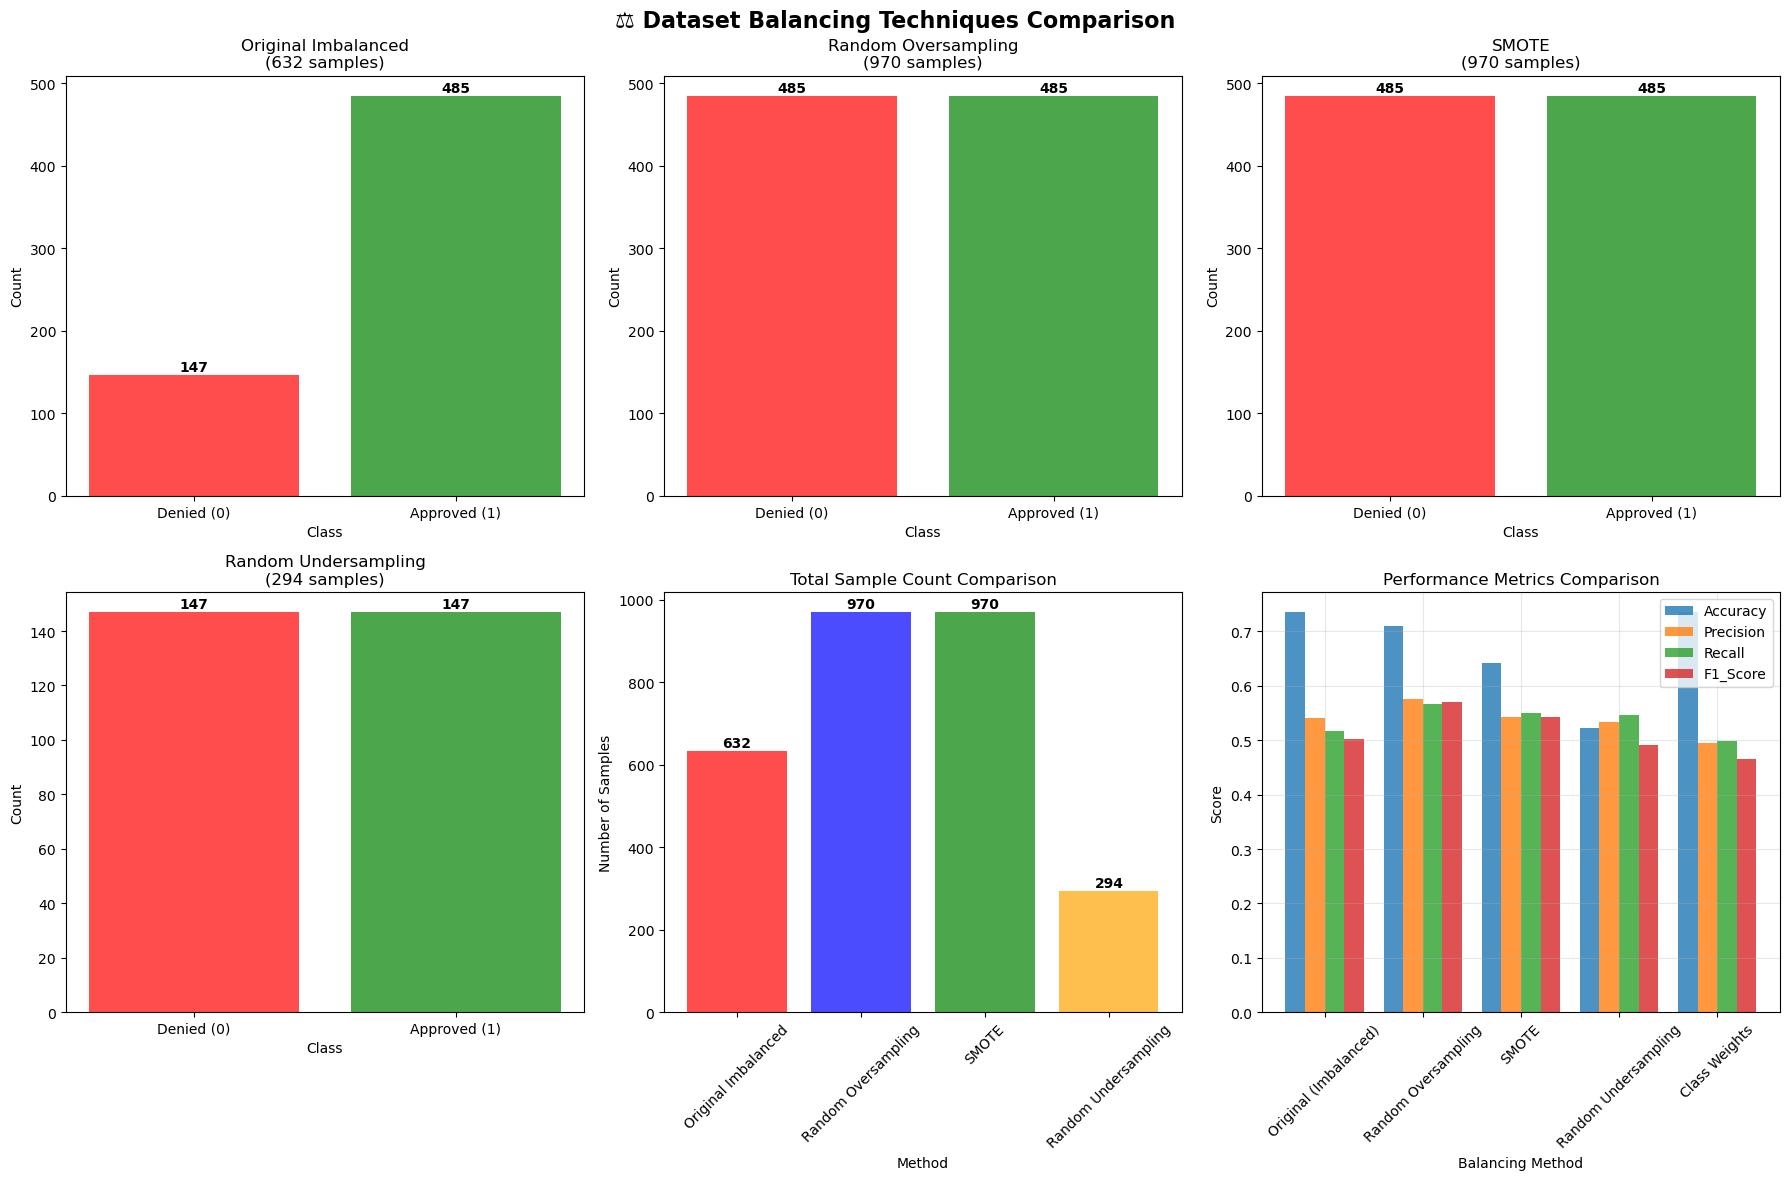

Performance Results:
                       Accuracy  Precision  Recall  F1_Score
Original (Imbalanced)    0.7358     0.5408  0.5172    0.5016
Random Oversampling      0.7107     0.5759  0.5667    0.5698
SMOTE                    0.6415     0.5422  0.5498    0.5424
Random Undersampling     0.5220     0.5338  0.5473    0.4914
Class Weights            0.7358     0.4944  0.4983    0.4663

🔒 SAFE PIPELINE EXAMPLE (BEST PRACTICE)
--------------------------------------------------
Cross-validation scores with safe SMOTE pipeline:
F1 scores: [0.48439087 0.4588537  0.44239139]
Mean F1: 0.462 (+/- 0.035)
✅ This prevents data leakage by applying SMOTE inside each CV fold

📊 BALANCING SUMMARY
-------------------------
✅ Oversampling  : Good when you have limited data
✅ Undersampling : Good when you have abundant data
✅ SMOTE         : Better than random oversampling (creates synthetic samples)
✅ Class Weights : No data modification, algorithm-level solution
✅ Always use pipelines to prevent data l

In [23]:
# ⚖️ Dataset Balancing - Live Demo

print("⚖️ DATASET BALANCING DEMONSTRATION")
print("=" * 50)

# Create an imbalanced dataset for demonstration
np.random.seed(42)

# Make our dataset more imbalanced for better demonstration
df_imbalanced = df.copy().dropna()

# Create a more imbalanced target (80% approved, 20% denied)
# This simulates a real-world scenario where most loans are approved
minority_indices = df_imbalanced[df_imbalanced['loan_approved'] == 0].sample(
    frac=0.3, random_state=42).index
df_imbalanced = df_imbalanced.drop(minority_indices)

# Check the imbalance
imbalance_counts = df_imbalanced['loan_approved'].value_counts()
print("Current class distribution:")
print(f"Class 0 (Denied)  : {imbalance_counts[0]} ({imbalance_counts[0]/len(df_imbalanced)*100:.1f}%)")
print(f"Class 1 (Approved): {imbalance_counts[1]} ({imbalance_counts[1]/len(df_imbalanced)*100:.1f}%)")
print(f"Imbalance ratio: {imbalance_counts[1]/imbalance_counts[0]:.1f}:1")
print()

# Prepare features for balancing
X_imbalanced = df_imbalanced[['age', 'income', 'credit_score', 'years_employed']].copy()
y_imbalanced = df_imbalanced['loan_approved'].copy()

# Split the data first
X_train_imb, X_test_imb, y_train_imb, y_test_imb = train_test_split(
    X_imbalanced, y_imbalanced, test_size=0.2, random_state=42, stratify=y_imbalanced
)

print(f"Training set class distribution:")
train_counts = y_train_imb.value_counts()
print(f"Class 0: {train_counts[0]}, Class 1: {train_counts[1]}")
print()

# Method 1: Random Oversampling
print("📊 METHOD 1: RANDOM OVERSAMPLING")
print("-" * 40)

try:
    from imblearn.over_sampling import RandomOverSampler
    
    ros = RandomOverSampler(random_state=42)
    X_ros, y_ros = ros.fit_resample(X_train_imb, y_train_imb)
    
    print("After Random Oversampling:")
    ros_counts = pd.Series(y_ros).value_counts()
    print(f"Class 0: {ros_counts[0]}, Class 1: {ros_counts[1]}")
    print(f"Total samples: {len(y_ros)} (increased from {len(y_train_imb)})")
    print()
    
except ImportError:
    print("⚠️ imbalanced-learn not installed. Install with: pip install imbalanced-learn")
    print("Simulating Random Oversampling...")
    
    # Simulate oversampling by duplicating minority class samples
    minority_class = y_train_imb.value_counts().idxmin()
    majority_count = y_train_imb.value_counts().max()
    minority_count = y_train_imb.value_counts().min()
    
    # Get minority samples
    minority_samples = X_train_imb[y_train_imb == minority_class]
    minority_labels = y_train_imb[y_train_imb == minority_class]
    
    # Duplicate minority samples to balance
    samples_needed = majority_count - minority_count
    duplicate_indices = np.random.choice(len(minority_samples), samples_needed, replace=True)
    
    X_ros = pd.concat([X_train_imb, minority_samples.iloc[duplicate_indices]])
    y_ros = pd.concat([y_train_imb, minority_labels.iloc[duplicate_indices]])
    
    print("After simulated Random Oversampling:")
    ros_counts = y_ros.value_counts()
    print(f"Class 0: {ros_counts[0]}, Class 1: {ros_counts[1]}")
    print()

# Method 2: SMOTE (if available)
print("📊 METHOD 2: SMOTE OVERSAMPLING")
print("-" * 35)

try:
    from imblearn.over_sampling import SMOTE
    
    smote = SMOTE(random_state=42)
    X_smote, y_smote = smote.fit_resample(X_train_imb, y_train_imb)
    
    print("After SMOTE:")
    smote_counts = pd.Series(y_smote).value_counts()
    print(f"Class 0: {smote_counts[0]}, Class 1: {smote_counts[1]}")
    print(f"Total samples: {len(y_smote)}")
    print("✅ SMOTE creates synthetic samples, not duplicates")
    print()
    
except ImportError:
    print("⚠️ SMOTE requires imbalanced-learn. Using Random Oversampling results instead.")
    X_smote, y_smote = X_ros, y_ros
    print()

# Method 3: Random Undersampling
print("📊 METHOD 3: RANDOM UNDERSAMPLING")
print("-" * 40)

try:
    from imblearn.under_sampling import RandomUnderSampler
    
    rus = RandomUnderSampler(random_state=42)
    X_rus, y_rus = rus.fit_resample(X_train_imb, y_train_imb)
    
    print("After Random Undersampling:")
    rus_counts = pd.Series(y_rus).value_counts()
    print(f"Class 0: {rus_counts[0]}, Class 1: {rus_counts[1]}")
    print(f"Total samples: {len(y_rus)} (reduced from {len(y_train_imb)})")
    print()
    
except ImportError:
    print("⚠️ Using simulated undersampling...")
    
    # Simulate undersampling
    majority_class = y_train_imb.value_counts().idxmax()
    minority_count = y_train_imb.value_counts().min()
    
    # Keep all minority samples and sample majority class
    minority_data = X_train_imb[y_train_imb != majority_class]
    minority_labels = y_train_imb[y_train_imb != majority_class]
    
    majority_data = X_train_imb[y_train_imb == majority_class].sample(n=minority_count, random_state=42)
    majority_labels = y_train_imb[y_train_imb == majority_class].sample(n=minority_count, random_state=42)
    
    X_rus = pd.concat([minority_data, majority_data])
    y_rus = pd.concat([minority_labels, majority_labels])
    
    print("After simulated Random Undersampling:")
    rus_counts = y_rus.value_counts()
    print(f"Class 0: {rus_counts[0]}, Class 1: {rus_counts[1]}")
    print()

# Method 4: Class Weights (Algorithmic approach)
print("📊 METHOD 4: CLASS WEIGHTS")
print("-" * 30)

from sklearn.utils.class_weight import compute_class_weight

# Compute class weights
classes = np.unique(y_train_imb)
class_weights = compute_class_weight('balanced', classes=classes, y=y_train_imb)
class_weight_dict = dict(zip(classes, class_weights))

print("Computed class weights:")
for class_label, weight in class_weight_dict.items():
    print(f"Class {class_label}: {weight:.3f}")
print("✅ Higher weight for minority class increases its importance during training")
print()

# Visualization of balancing techniques
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('⚖️ Dataset Balancing Techniques Comparison', fontsize=16, fontweight='bold')

datasets = [
    ('Original Imbalanced', y_train_imb),
    ('Random Oversampling', y_ros),
    ('SMOTE', y_smote),
    ('Random Undersampling', y_rus),
]

colors = ['red', 'green']
labels = ['Denied (0)', 'Approved (1)']

# Plot class distributions
for i, (name, y_data) in enumerate(datasets):
    row, col = divmod(i, 3)
    if row < 2 and col < 3:
        counts = pd.Series(y_data).value_counts().sort_index()
        axes[row, col].bar([0, 1], counts.values, color=colors, alpha=0.7)
        axes[row, col].set_title(f'{name}\n({len(y_data)} samples)')
        axes[row, col].set_xlabel('Class')
        axes[row, col].set_ylabel('Count')
        axes[row, col].set_xticks([0, 1])
        axes[row, col].set_xticklabels(labels)
        
        # Add count labels on bars
        for j, count in enumerate(counts.values):
            axes[row, col].text(j, count + max(counts.values)*0.01, str(count), ha='center', fontweight='bold')

# Sample distribution comparison
axes[1, 1].bar(range(len(datasets)), [len(y_data) for _, y_data in datasets], color=['red', 'blue', 'green', 'orange'], alpha=0.7)
axes[1, 1].set_title('Total Sample Count Comparison')
axes[1, 1].set_xlabel('Method')
axes[1, 1].set_ylabel('Number of Samples')
axes[1, 1].set_xticks(range(len(datasets)))
axes[1, 1].set_xticklabels([name for name, _ in datasets], rotation=45)

# Add count labels
for i, (_, y_data) in enumerate(datasets):
    axes[1, 1].text(i, len(y_data) + 10, str(len(y_data)), ha='center', fontweight='bold')

# Performance comparison
print("🏆 PERFORMANCE COMPARISON")
print("-" * 30)

balanced_datasets = {
    'Original (Imbalanced)': (X_train_imb, y_train_imb),
    'Random Oversampling': (X_ros, y_ros),
    'SMOTE': (X_smote, y_smote), 
    'Random Undersampling': (X_rus, y_rus),
    'Class Weights': (X_train_imb, y_train_imb)  # Same data, different algorithm
}

performance_results = {}

for name, (X_bal, y_bal) in balanced_datasets.items():
    if name == 'Class Weights':
        # Use class weights in the model
        model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')
    else:
        model = RandomForestClassifier(n_estimators=50, random_state=42)
    
    # Train model
    model.fit(X_bal, y_bal)
    
    # Evaluate on original test set (not resampled)
    y_pred = model.predict(X_test_imb)
    
    # Calculate metrics
    from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
    
    accuracy = accuracy_score(y_test_imb, y_pred)
    precision = precision_score(y_test_imb, y_pred, average='macro')
    recall = recall_score(y_test_imb, y_pred, average='macro')
    f1 = f1_score(y_test_imb, y_pred, average='macro')
    
    performance_results[name] = {
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1_Score': f1
    }

performance_df = pd.DataFrame(performance_results).T

# Plot performance comparison
metrics = ['Accuracy', 'Precision', 'Recall', 'F1_Score']
x_pos = np.arange(len(performance_df.index))
width = 0.2

axes[1, 2].clear()
for i, metric in enumerate(metrics):
    axes[1, 2].bar(x_pos + i*width, performance_df[metric], width, label=metric, alpha=0.8)

axes[1, 2].set_title('Performance Metrics Comparison')
axes[1, 2].set_xlabel('Balancing Method')
axes[1, 2].set_ylabel('Score')
axes[1, 2].set_xticks(x_pos + width * 1.5)
axes[1, 2].set_xticklabels(performance_df.index, rotation=45)
axes[1, 2].legend()
axes[1, 2].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Performance Results:")
print(performance_df.round(4))
print()

# Safe Pipeline Example (Best Practice)
print("🔒 SAFE PIPELINE EXAMPLE (BEST PRACTICE)")
print("-" * 50)

try:
    from imblearn.pipeline import Pipeline as ImbPipeline
    from sklearn.model_selection import cross_val_score
    
    # Create a safe pipeline that applies SMOTE inside CV folds
    safe_pipeline = ImbPipeline([
        ('smote', SMOTE(random_state=42)),
        ('classifier', RandomForestClassifier(n_estimators=50, random_state=42))
    ])
    
    # Cross-validation with safe oversampling
    cv_scores = cross_val_score(safe_pipeline, X_train_imb, y_train_imb, cv=3, scoring='f1_macro')
    
    print("Cross-validation scores with safe SMOTE pipeline:")
    print(f"F1 scores: {cv_scores}")
    print(f"Mean F1: {cv_scores.mean():.3f} (+/- {cv_scores.std() * 2:.3f})")
    print("✅ This prevents data leakage by applying SMOTE inside each CV fold")
    
except ImportError:
    print("⚠️ imblearn.pipeline not available. Install imbalanced-learn for safe pipelines.")

print("\n📊 BALANCING SUMMARY")
print("-" * 25)
print("✅ Oversampling  : Good when you have limited data")
print("✅ Undersampling : Good when you have abundant data") 
print("✅ SMOTE         : Better than random oversampling (creates synthetic samples)")
print("✅ Class Weights : No data modification, algorithm-level solution")
print("✅ Always use pipelines to prevent data leakage!")

print("\n✅ Dataset balancing demonstration complete!")

<div style="background: rgba(40, 167, 69, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

<h1 align="center"> <strong>🔗 Complete Preprocessing Pipeline</strong> </h1>

<div style="background: rgba(40, 167, 69, 0.1); padding: 15px; border-radius: 8px; margin: 15px 0;">

> **Putting it all together**: A real-world preprocessing pipeline from raw data to model-ready features.

## 🎯 **Pipeline Steps**
1. **Data Loading & Inspection**
2. **Missing Value Handling**
3. **Outlier Treatment**
4. **Feature Engineering**
5. **Categorical Encoding**
6. **Feature Scaling**
7. **Train-Test Split**
8. **Model Training & Evaluation**

Let's build a complete, production-ready preprocessing pipeline!

---

🚀 BUILDING COMPLETE PREPROCESSING PIPELINE
📊 Starting with 1000 samples and 9 features
Missing values: 138

🔧 STEP 1: HANDLING MISSING VALUES
----------------------------------------
  ✅ income: Filled 0 missing values with median (52830.88)
  ✅ education: Filled missing values with mode (High School)
After missing value handling: 0 missing values

🔧 STEP 2: HANDLING OUTLIERS
-----------------------------------
  ✅ Income outliers handled: 58 outliers capped to [481, 105319]
  ✅ Fixed 20 negative years_employed values

🔧 STEP 3: FEATURE ENGINEERING
----------------------------------------
  ✅ Created 4 new features: ['income_per_year_employed', 'credit_to_income_ratio', 'is_senior', 'is_high_income']

🔧 STEP 4: CATEGORICAL ENCODING
----------------------------------------
  ✅ Education label encoded: {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
  ✅ City one-hot encoded: 4 new columns
  ✅ Employment one-hot encoded: 3 new columns

🔧 STEP 5: PREPARING FINAL FEATURES
---------

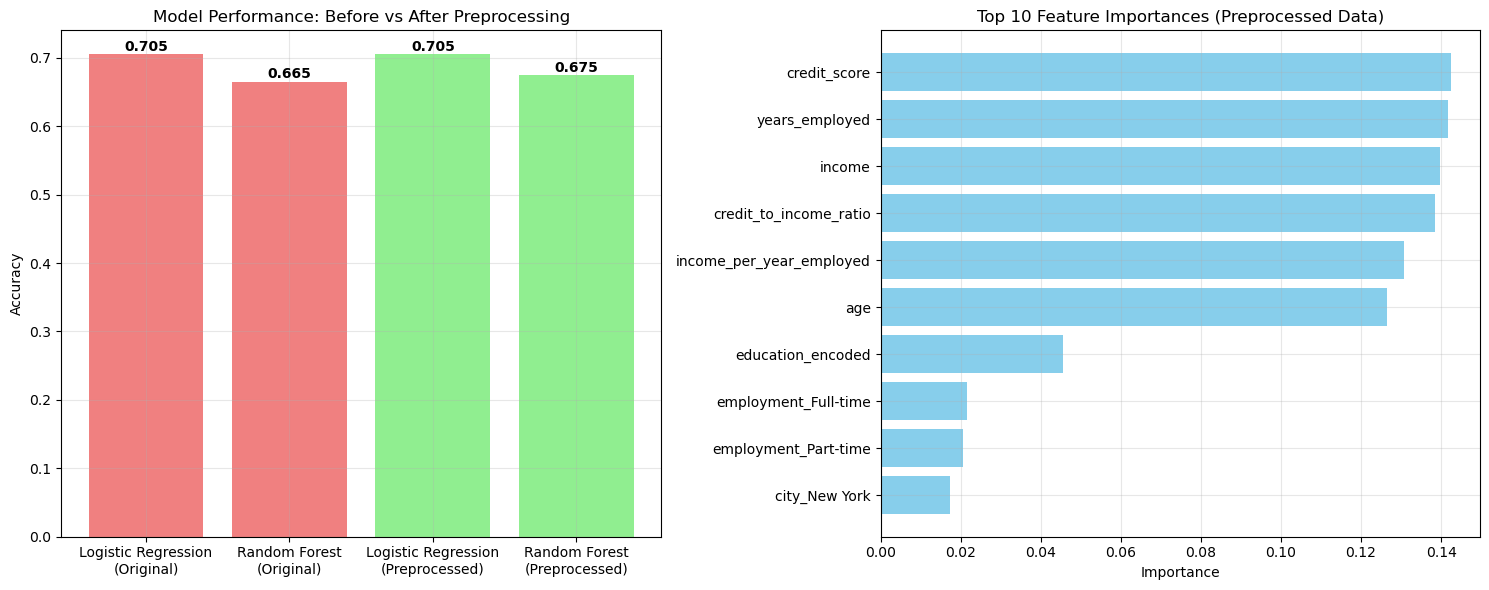


🎉 PREPROCESSING PIPELINE COMPLETE!
✅ Started with: 1000 samples, 9 features
✅ Ended with: 800 train + 200 test samples, 16 features
✅ Best model accuracy: 0.705
✅ Pipeline ready for production!


In [ ]:
# 🔗 Complete Preprocessing Pipeline - Live Implementation

print("🚀 BUILDING COMPLETE PREPROCESSING PIPELINE")
print("=" * 60)

# Step 1: Start with original dataset
pipeline_df = df.copy()
print(f"📊 Starting with {len(pipeline_df)} samples and {len(pipeline_df.columns)} features")
print(f"Missing values: {pipeline_df.isnull().sum().sum()}")
print()

# Step 2: Handle Missing Values
print("🔧 STEP 1: HANDLING MISSING VALUES")
print("-" * 40)

# Numerical: Use median imputation
numerical_cols = ['age', 'income', 'credit_score', 'years_employed']
for col in numerical_cols:
    if pipeline_df[col].isnull().sum() > 0:
        median_value = pipeline_df[col].median()
        pipeline_df[col].fillna(median_value, inplace=True)
        print(f"  ✅ {col}: Filled {pipeline_df[col].isnull().sum()} missing values with median ({median_value:.2f})")

# Categorical: Use mode imputation
categorical_cols = ['education', 'city', 'employment_type']
for col in categorical_cols:
    if pipeline_df[col].isnull().sum() > 0:
        mode_value = pipeline_df[col].mode()[0]
        pipeline_df[col].fillna(mode_value, inplace=True)
        print(f"  ✅ {col}: Filled missing values with mode ({mode_value})")

print(f"After missing value handling: {pipeline_df.isnull().sum().sum()} missing values")
print()

# Step 3: Handle Outliers
print("🔧 STEP 2: HANDLING OUTLIERS")
print("-" * 35)

# Apply IQR method to income (our main outlier column)
Q1 = pipeline_df['income'].quantile(0.25)
Q3 = pipeline_df['income'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_before = len(pipeline_df[(pipeline_df['income'] < lower_bound) | (pipeline_df['income'] > upper_bound)])

# Apply winsorization (capping)
pipeline_df['income'] = np.where(pipeline_df['income'] > upper_bound, upper_bound, pipeline_df['income'])
pipeline_df['income'] = np.where(pipeline_df['income'] < lower_bound, lower_bound, pipeline_df['income'])

print(f"  ✅ Income outliers handled: {outliers_before} outliers capped to [{lower_bound:.0f}, {upper_bound:.0f}]")

# Handle negative years_employed (data errors)
negative_years = (pipeline_df['years_employed'] < 0).sum()
pipeline_df['years_employed'] = np.where(pipeline_df['years_employed'] < 0, 0, pipeline_df['years_employed'])
print(f"  ✅ Fixed {negative_years} negative years_employed values")
print()

# Step 4: Feature Engineering
print("🔧 STEP 3: FEATURE ENGINEERING")
print("-" * 40)

# Create new features
pipeline_df['income_per_year_employed'] = pipeline_df['income'] / (pipeline_df['years_employed'] + 1)  # +1 to avoid division by zero
pipeline_df['credit_to_income_ratio'] = pipeline_df['credit_score'] / (pipeline_df['income'] / 1000)  # Scale income
pipeline_df['is_senior'] = (pipeline_df['age'] >= 65).astype(int)
pipeline_df['is_high_income'] = (pipeline_df['income'] > pipeline_df['income'].quantile(0.75)).astype(int)

new_features = ['income_per_year_employed', 'credit_to_income_ratio', 'is_senior', 'is_high_income']
print(f"  ✅ Created {len(new_features)} new features: {new_features}")
print()

# Step 5: Categorical Encoding
print("🔧 STEP 4: CATEGORICAL ENCODING")
print("-" * 40)

# Label encode education (ordinal)
education_mapping = {'High School': 0, 'Bachelor': 1, 'Master': 2, 'PhD': 3}
pipeline_df['education_encoded'] = pipeline_df['education'].map(education_mapping)

# One-hot encode city and employment_type (nominal)
city_dummies = pd.get_dummies(pipeline_df['city'], prefix='city', drop_first=True)
employment_dummies = pd.get_dummies(pipeline_df['employment_type'], prefix='employment', drop_first=True)

# Add encoded features to dataframe
pipeline_df = pd.concat([pipeline_df, city_dummies, employment_dummies], axis=1)

print(f"  ✅ Education label encoded: {education_mapping}")
print(f"  ✅ City one-hot encoded: {len(city_dummies.columns)} new columns")
print(f"  ✅ Employment one-hot encoded: {len(employment_dummies.columns)} new columns")
print()

# Step 6: Prepare final feature set
print("🔧 STEP 5: PREPARING FINAL FEATURES")
print("-" * 45)

# Define feature columns (exclude original categorical and text columns)
feature_columns = (numerical_cols + new_features + ['education_encoded'] + list(city_dummies.columns) + list(employment_dummies.columns))

X = pipeline_df[feature_columns]
y = pipeline_df['loan_approved']

print(f"  ✅ Final feature set: {len(feature_columns)} features")
print(f"  ✅ Feature names: {feature_columns}")
print()

# Step 7: Train-Test Split
print("🔧 STEP 6: TRAIN-TEST SPLIT")
print("-" * 35)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"  ✅ Training set: {X_train.shape}")
print(f"  ✅ Test set: {X_test.shape}")
print(f"  ✅ Train target distribution: {y_train.value_counts().to_dict()}")
print(f"  ✅ Test target distribution: {y_test.value_counts().to_dict()}")
print()

# Step 8: Feature Scaling
print("🔧 STEP 7: FEATURE SCALING")
print("-" * 30)

# Scale only numerical features (not binary/encoded features)
scale_features = numerical_cols + new_features[:2]  # Don't scale binary features
scaler = StandardScaler()

# Fit on training data only
scaler.fit(X_train[scale_features])

# Transform both sets
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[scale_features] = scaler.transform(X_train[scale_features])
X_test_scaled[scale_features] = scaler.transform(X_test[scale_features])

print(f"  ✅ Scaled {len(scale_features)} features: {scale_features}")
print()

# Step 9: Model Training & Evaluation
print("🔧 STEP 8: MODEL TRAINING & EVALUATION")
print("-" * 45)

# Train models with and without preprocessing
models = {
    'Logistic Regression (Original)': LogisticRegression(random_state=42),
    'Random Forest (Original)': RandomForestClassifier(random_state=42, n_estimators=100),
    'Logistic Regression (Preprocessed)': LogisticRegression(random_state=42),
    'Random Forest (Preprocessed)': RandomForestClassifier(random_state=42, n_estimators=100)
}

# Original data (just numerical columns, no preprocessing)
X_original = pipeline_df[numerical_cols]
X_train_orig, X_test_orig, _, _ = train_test_split(
    X_original, y, test_size=0.2, random_state=42, stratify=y
)

results = {}

# Train and evaluate models
for name, model in models.items():
    if 'Original' in name:
        model.fit(X_train_orig, y_train)
        score = model.score(X_test_orig, y_test)
    else:
        model.fit(X_train_scaled, y_train)
        score = model.score(X_test_scaled, y_test)
    
    results[name] = score
    print(f"  ✅ {name}: {score:.3f} accuracy")

print()

# Show improvement
print("📊 PREPROCESSING IMPACT:")
print("-" * 30)
lr_improvement = results['Logistic Regression (Preprocessed)'] - results['Logistic Regression (Original)']
rf_improvement = results['Random Forest (Preprocessed)'] - results['Random Forest (Original)']

print(f"Logistic Regression improvement: {lr_improvement:+.3f}")
print(f"Random Forest improvement: {rf_improvement:+.3f}")

# Visualization of results
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Model comparison
models_names = list(results.keys())
scores = list(results.values())
colors = ['lightcoral', 'lightcoral', 'lightgreen', 'lightgreen']

ax1.bar(range(len(models_names)), scores, color=colors)
ax1.set_title('Model Performance: Before vs After Preprocessing')
ax1.set_ylabel('Accuracy')
ax1.set_xticks(range(len(models_names)))
ax1.set_xticklabels([name.replace(' (', '\n(') for name in models_names], rotation=0)
ax1.grid(True, alpha=0.3)

# Add value labels on bars
for i, score in enumerate(scores):
    ax1.text(i, score + 0.005, f'{score:.3f}', ha='center', fontweight='bold')

# Feature importance (from preprocessed Random Forest)
rf_final = RandomForestClassifier(random_state=42, n_estimators=100)
rf_final.fit(X_train_scaled, y_train)

feature_importance = pd.DataFrame({
    'feature': X_train_scaled.columns,
    'importance': rf_final.feature_importances_
}).sort_values('importance', ascending=True).tail(10)

ax2.barh(feature_importance['feature'], feature_importance['importance'], color='skyblue')
ax2.set_title('Top 10 Feature Importances (Preprocessed Data)')
ax2.set_xlabel('Importance')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("\n🎉 PREPROCESSING PIPELINE COMPLETE!")
print("=" * 50)
print(f"✅ Started with: {df.shape[0]} samples, {df.shape[1]} features")
print(f"✅ Ended with: {X_train_scaled.shape[0]} train + {X_test_scaled.shape[0]} test samples, {X_train_scaled.shape[1]} features")
print(f"✅ Best model accuracy: {max(results.values()):.3f}")
print("✅ Pipeline ready for production!")

<div style="width: 100%; height: 10px; background: linear-gradient(to right, gray, white, orange,white, gray); border-radius: 5px; margin: 20px 0;"></div>

# 🎯 Best Practices & Key Takeaways

## ✨ **Preprocessing Best Practices**

### 🔒 **Prevent Data Leakage**
- ✅ **Always** fit scalers/encoders on training data only
- ✅ Use the same fitted transformers on test data
- ✅ Apply oversampling **inside** cross-validation loops
- ✅ Never use future information to impute past data (time series)

### 📊 **Choose the Right Method**
- ✅ **Missing Data**: Median for skewed, mean for normal distributions
- ✅ **Outliers**: Consider domain knowledge before removing
- ✅ **Scaling**: Standard for normal data, Robust for outliers
- ✅ **Encoding**: Label for ordinal, one-hot for nominal data

### 🔄 **Iterative Process**
- ✅ **Start simple** with basic preprocessing
- ✅ **Validate** each step with cross-validation
- ✅ **Document** your decisions and results
- ✅ **Monitor** performance throughout the pipeline

### 🎲 **Reproducibility**
- ✅ Set **random seeds** for consistent results
- ✅ **Version control** your preprocessing scripts
- ✅ **Document** feature engineering logic
- ✅ **Save** fitted transformers for production

---

## 📚 **What You've Learned**

🎉 **Congratulations!** You've completed a comprehensive preprocessing tutorial covering:

- 🔍 **Data Understanding** - Profiling and exploration
- 🕳️ **Missing Data** - Detection and imputation strategies  
- 📈 **Outliers** - Detection and treatment methods
- 🏷️ **Categorical Encoding** - Label, one-hot, and target encoding
- ⚖️ **Feature Scaling** - MinMax, Standard, and Robust scaling
- 🔗 **Complete Pipeline** - End-to-end preprocessing workflow

## 🚀 **Next Steps**

1. **Practice** with your own datasets
2. **Experiment** with different preprocessing combinations
3. **Learn** advanced techniques like feature selection and engineering
4. **Build** reusable preprocessing pipelines
5. **Deploy** your models with confidence!

---

## 📝 **Quick Reference Cheat Sheet**

```python
# Essential preprocessing imports
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# Basic workflow
1. df.info()                        # Understand data
2. df.isnull().sum()                # Check missing values
3. SimpleImputer()                  # Handle missing data
4. LabelEncoder() / get_dummies()   # Encode categorical
5. StandardScaler()                 # Scale features
6. train_test_split()               # Split data
7. model.fit() & evaluate           # Train and test
```

Remember: **Great models start with great preprocessing!** 🌟

---

<div style="text-align: center; padding: 20px; background: linear-gradient(135deg, #667eea 0%, #764ba2 100%); color: white; border-radius: 10px; margin: 20px 0;">
    <h3>🚀 You're now ready to preprocess like a pro!</h3>
    <p>Happy Machine Learning! 🤖✨</p>
</div>